# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [191]:
"""
you will be forecasting real estate prices of various zip codes 

What are the top 5 best zip codes for us to invest in?

Should your recommendation be focused on profit margins only? 
What about risk? 
What sort of time horizon are you predicting against? 
Your recommendation will need to detail your rationale and answer any sort of lingering questions like these 
    in order to demonstrate how you define "best".

Evaluation
In addition to deciding which quantitative metric(s) you want to target (e.g. minimizing mean squared error), 
    you need to start with a definition of "best investment". 
    Consider additional metrics like risk vs. profitability, or ROI yield.


"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller

In [192]:
pd.set_option('display.max_columns', None)  
df = pd.read_csv('zillow_data.csv')
df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank    1996-04    1996-05    1996-06    1996-07    1996-08    1996-09  \
0         1 334200.000 335400.000 336500.000 337600.000 338500.000 339500.000   
1         2 235700.000 236900.000 236700.000 235400.000 233300.000 230600.000   
2         3 210400.000 212200.000 212200.000 210700.000 208300.000 205500.000   
3         4 498100.000 500900.000 503100.000 504600.000 505500.000 505700.000   
4         5  77300.000  77300.000  77300.000  77300.000  77400.000  77500.000   

     1996-10    1996-11    1996-12    1997-01    1997-02    1997-03  \
0 340400.000 341300.000 342600.000 344400.000 345700.000 346700.000   
1 227300.000 223400.000 219600.000 215800.000 211100.000 205700.000   
2 202500.000 199800.000 198300.000 197300.000 195400.000 193000.000   
3 505300.000 504200.000 503600.000 503400.000 502200.000 500000.000   
4  77600.000  77700.000  77700.000  77800.000  77900.000  77900.000   

     1997-04    1997-05    1997-06    1997-07    1997-08    1997-09  \
0 347800.000 349000.000 350400.000 352000.000 353900.000 356200.000   
1 200900.000 196800.000 193600.000 191400.000 190400.000 190800.000   
2 191800.000 191800.000 193000.000 195200.000 198400.000 202800.000   
3 497900.000 496300.000 495200.000 494700.000 494900.000 496200.000   
4  77800.000  77800.000  77800.000  77800.000  77800.000  77900.000   

     1997-10    1997-11    1997-12    1998-01    1998-02    1998-03  \
0 358800.000 361800.000 365700.000 370200.000 374700.000 378900.000   
1 192700.000 196000.000 201300.000 207400.000 212200.000 214600.000   
2 208000.000 213800.000 220700.000 227500.000 231800.000 233400.000   
3 498600.000 502000.000 507600.000 514900.000 522200.000 529500.000   
4  78100.000  78200.000  78400.000  78600.000  78800.000  79000.000   

     1998-04    1998-05    1998-06    1998-07    1998-08    1998-09  \
0 383500.000 388300.000 393300.000 398500.000 403800.000 409100.000   
1 215100.000 213400.000 210200.000 206100.000 202100.000 198800.000   
2 233900.000 233500.000 233300.000 234300.000 237400.000 242800.000   
3 537900.000 546900.000 556400.000 566100.000 575600.000 584800.000   
4  79100.000  79200.000  79300.000  79300.000  79300.000  79400.000   

     1998-10    1998-11    1998-12    1999-01    1999-02    1999-03  \
0 414600.000 420100.000 426200.000 432600.000 438600.000 444200.000   
1 196100.000 194100.000 193400.000 193400.000 193100.000 192700.000   
2 250200.000 258600.000 268000.000 277000.000 283600.000 288500.000   
3 593500.000 601600.000 610100.000 618600.000 625600.000 631100.000   
4  79500.000  79500.000  79600.000  79700.000  79900.000  80100.000   

     1999-04    1999-05    1999-06    1999-07    1999-08    1999-09  \
0 450000.000 455900.000 462100.000 468500.000 475300.000 482500.000   
1 193000.000 193700.000 194800.000 196100.000 197800.000 199700.000   
2 293900.000 299200.000 304300.000 308600.000 311400.000 312300.000   
3 636600.000 642100.000 647600.000 653300.000 659300.000 665800.000   
4  80300.000  80600.000  80900.000  81200.000  81400.000  81700.000   

     1999-10    1999-11    1999-12    2000-01    2000-02    2000-03  \
0 490200.000 498200.000 507200.000 516800.000 526300.000 535300.000   
1 201900.000 204500.000 207800.000 211500.000 214900.000 217800.000   
2 311900.000 311100.000 311700.000 313500.000 315000.000 316700.000   
3 672900.000 680500.000 689600.000 699700.000 709300.000 718300.000   
4  82100.000  82400.000  82600.000  82800.000  82900.000  83000.000   

     2000-04    2000-05    2000-06    2000-07    2000-08    2000-09  \
0 544500.000 5535

In [193]:
pd.set_option('display.max_columns', None)  
df_sal = pd.read_csv('zillow_data.csv')
df_sal.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank    1996-04    1996-05    1996-06    1996-07    1996-08    1996-09  \
0         1 334200.000 335400.000 336500.000 337600.000 338500.000 339500.000   
1         2 235700.000 236900.000 236700.000 235400.000 233300.000 230600.000   
2         3 210400.000 212200.000 212200.000 210700.000 208300.000 205500.000   
3         4 498100.000 500900.000 503100.000 504600.000 505500.000 505700.000   
4         5  77300.000  77300.000  77300.000  77300.000  77400.000  77500.000   

     1996-10    1996-11    1996-12    1997-01    1997-02    1997-03  \
0 340400.000 341300.000 342600.000 344400.000 345700.000 346700.000   
1 227300.000 223400.000 219600.000 215800.000 211100.000 205700.000   
2 202500.000 199800.000 198300.000 197300.000 195400.000 193000.000   
3 505300.000 504200.000 503600.000 503400.000 502200.000 500000.000   
4  77600.000  77700.000  77700.000  77800.000  77900.000  77900.000   

     1997-04    1997-05    1997-06    1997-07    1997-08    1997-09  \
0 347800.000 349000.000 350400.000 352000.000 353900.000 356200.000   
1 200900.000 196800.000 193600.000 191400.000 190400.000 190800.000   
2 191800.000 191800.000 193000.000 195200.000 198400.000 202800.000   
3 497900.000 496300.000 495200.000 494700.000 494900.000 496200.000   
4  77800.000  77800.000  77800.000  77800.000  77800.000  77900.000   

     1997-10    1997-11    1997-12    1998-01    1998-02    1998-03  \
0 358800.000 361800.000 365700.000 370200.000 374700.000 378900.000   
1 192700.000 196000.000 201300.000 207400.000 212200.000 214600.000   
2 208000.000 213800.000 220700.000 227500.000 231800.000 233400.000   
3 498600.000 502000.000 507600.000 514900.000 522200.000 529500.000   
4  78100.000  78200.000  78400.000  78600.000  78800.000  79000.000   

     1998-04    1998-05    1998-06    1998-07    1998-08    1998-09  \
0 383500.000 388300.000 393300.000 398500.000 403800.000 409100.000   
1 215100.000 213400.000 210200.000 206100.000 202100.000 198800.000   
2 233900.000 233500.000 233300.000 234300.000 237400.000 242800.000   
3 537900.000 546900.000 556400.000 566100.000 575600.000 584800.000   
4  79100.000  79200.000  79300.000  79300.000  79300.000  79400.000   

     1998-10    1998-11    1998-12    1999-01    1999-02    1999-03  \
0 414600.000 420100.000 426200.000 432600.000 438600.000 444200.000   
1 196100.000 194100.000 193400.000 193400.000 193100.000 192700.000   
2 250200.000 258600.000 268000.000 277000.000 283600.000 288500.000   
3 593500.000 601600.000 610100.000 618600.000 625600.000 631100.000   
4  79500.000  79500.000  79600.000  79700.000  79900.000  80100.000   

     1999-04    1999-05    1999-06    1999-07    1999-08    1999-09  \
0 450000.000 455900.000 462100.000 468500.000 475300.000 482500.000   
1 193000.000 193700.000 194800.000 196100.000 197800.000 199700.000   
2 293900.000 299200.000 304300.000 308600.000 311400.000 312300.000   
3 636600.000 642100.000 647600.000 653300.000 659300.000 665800.000   
4  80300.000  80600.000  80900.000  81200.000  81400.000  81700.000   

     1999-10    1999-11    1999-12    2000-01    2000-02    2000-03  \
0 490200.000 498200.000 507200.000 516800.000 526300.000 535300.000   
1 201900.000 204500.000 207800.000 211500.000 214900.000 217800.000   
2 311900.000 311100.000 311700.000 313500.000 315000.000 316700.000   
3 672900.000 680500.000 689600.000 699700.000 709300.000 718300.000   
4  82100.000  82400.000  82600.000  82800.000  82900.000  83000.000   

     2000-04    2000-05    2000-06    2000-07    2000-08    2000-09  \
0 544500.000 5535

In [194]:
pd.set_option('display.max_columns', None)  
data_ny = pd.read_csv('zillow_data.csv')
data_ny.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank    1996-04    1996-05    1996-06    1996-07    1996-08    1996-09  \
0         1 334200.000 335400.000 336500.000 337600.000 338500.000 339500.000   
1         2 235700.000 236900.000 236700.000 235400.000 233300.000 230600.000   
2         3 210400.000 212200.000 212200.000 210700.000 208300.000 205500.000   
3         4 498100.000 500900.000 503100.000 504600.000 505500.000 505700.000   
4         5  77300.000  77300.000  77300.000  77300.000  77400.000  77500.000   

     1996-10    1996-11    1996-12    1997-01    1997-02    1997-03  \
0 340400.000 341300.000 342600.000 344400.000 345700.000 346700.000   
1 227300.000 223400.000 219600.000 215800.000 211100.000 205700.000   
2 202500.000 199800.000 198300.000 197300.000 195400.000 193000.000   
3 505300.000 504200.000 503600.000 503400.000 502200.000 500000.000   
4  77600.000  77700.000  77700.000  77800.000  77900.000  77900.000   

     1997-04    1997-05    1997-06    1997-07    1997-08    1997-09  \
0 347800.000 349000.000 350400.000 352000.000 353900.000 356200.000   
1 200900.000 196800.000 193600.000 191400.000 190400.000 190800.000   
2 191800.000 191800.000 193000.000 195200.000 198400.000 202800.000   
3 497900.000 496300.000 495200.000 494700.000 494900.000 496200.000   
4  77800.000  77800.000  77800.000  77800.000  77800.000  77900.000   

     1997-10    1997-11    1997-12    1998-01    1998-02    1998-03  \
0 358800.000 361800.000 365700.000 370200.000 374700.000 378900.000   
1 192700.000 196000.000 201300.000 207400.000 212200.000 214600.000   
2 208000.000 213800.000 220700.000 227500.000 231800.000 233400.000   
3 498600.000 502000.000 507600.000 514900.000 522200.000 529500.000   
4  78100.000  78200.000  78400.000  78600.000  78800.000  79000.000   

     1998-04    1998-05    1998-06    1998-07    1998-08    1998-09  \
0 383500.000 388300.000 393300.000 398500.000 403800.000 409100.000   
1 215100.000 213400.000 210200.000 206100.000 202100.000 198800.000   
2 233900.000 233500.000 233300.000 234300.000 237400.000 242800.000   
3 537900.000 546900.000 556400.000 566100.000 575600.000 584800.000   
4  79100.000  79200.000  79300.000  79300.000  79300.000  79400.000   

     1998-10    1998-11    1998-12    1999-01    1999-02    1999-03  \
0 414600.000 420100.000 426200.000 432600.000 438600.000 444200.000   
1 196100.000 194100.000 193400.000 193400.000 193100.000 192700.000   
2 250200.000 258600.000 268000.000 277000.000 283600.000 288500.000   
3 593500.000 601600.000 610100.000 618600.000 625600.000 631100.000   
4  79500.000  79500.000  79600.000  79700.000  79900.000  80100.000   

     1999-04    1999-05    1999-06    1999-07    1999-08    1999-09  \
0 450000.000 455900.000 462100.000 468500.000 475300.000 482500.000   
1 193000.000 193700.000 194800.000 196100.000 197800.000 199700.000   
2 293900.000 299200.000 304300.000 308600.000 311400.000 312300.000   
3 636600.000 642100.000 647600.000 653300.000 659300.000 665800.000   
4  80300.000  80600.000  80900.000  81200.000  81400.000  81700.000   

     1999-10    1999-11    1999-12    2000-01    2000-02    2000-03  \
0 490200.000 498200.000 507200.000 516800.000 526300.000 535300.000   
1 201900.000 204500.000 207800.000 211500.000 214900.000 217800.000   
2 311900.000 311100.000 311700.000 313500.000 315000.000 316700.000   
3 672900.000 680500.000 689600.000 699700.000 709300.000 718300.000   
4  82100.000  82400.000  82600.000  82800.000  82900.000  83000.000   

     2000-04    2000-05    2000-06    2000-07    2000-08    2000-09  \
0 544500.000 5535

In [195]:
data_ny=data_ny.drop(["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], axis=1)

In [196]:
data_ny.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
data_ny.head()

Zipcode    1996-04    1996-05    1996-06    1996-07    1996-08    1996-09  \
0    60657 334200.000 335400.000 336500.000 337600.000 338500.000 339500.000   
1    75070 235700.000 236900.000 236700.000 235400.000 233300.000 230600.000   
2    77494 210400.000 212200.000 212200.000 210700.000 208300.000 205500.000   
3    60614 498100.000 500900.000 503100.000 504600.000 505500.000 505700.000   
4    79936  77300.000  77300.000  77300.000  77300.000  77400.000  77500.000   

     1996-10    1996-11    1996-12    1997-01    1997-02    1997-03  \
0 340400.000 341300.000 342600.000 344400.000 345700.000 346700.000   
1 227300.000 223400.000 219600.000 215800.000 211100.000 205700.000   
2 202500.000 199800.000 198300.000 197300.000 195400.000 193000.000   
3 505300.000 504200.000 503600.000 503400.000 502200.000 500000.000   
4  77600.000  77700.000  77700.000  77800.000  77900.000  77900.000   

     1997-04    1997-05    1997-06    1997-07    1997-08    1997-09  \
0 347800.000 349000.000 350400.000 352000.000 353900.000 356200.000   
1 200900.000 196800.000 193600.000 191400.000 190400.000 190800.000   
2 191800.000 191800.000 193000.000 195200.000 198400.000 202800.000   
3 497900.000 496300.000 495200.000 494700.000 494900.000 496200.000   
4  77800.000  77800.000  77800.000  77800.000  77800.000  77900.000   

     1997-10    1997-11    1997-12    1998-01    1998-02    1998-03  \
0 358800.000 361800.000 365700.000 370200.000 374700.000 378900.000   
1 192700.000 196000.000 201300.000 207400.000 212200.000 214600.000   
2 208000.000 213800.000 220700.000 227500.000 231800.000 233400.000   
3 498600.000 502000.000 507600.000 514900.000 522200.000 529500.000   
4  78100.000  78200.000  78400.000  78600.000  78800.000  79000.000   

     1998-04    1998-05    1998-06    1998-07    1998-08    1998-09  \
0 383500.000 388300.000 393300.000 398500.000 403800.000 409100.000   
1 215100.000 213400.000 210200.000 206100.000 202100.000 198800.000   
2 233900.000 233500.000 233300.000 234300.000 237400.000 242800.000   
3 537900.000 546900.000 556400.000 566100.000 575600.000 584800.000   
4  79100.000  79200.000  79300.000  79300.000  79300.000  79400.000   

     1998-10    1998-11    1998-12    1999-01    1999-02    1999-03  \
0 414600.000 420100.000 426200.000 432600.000 438600.000 444200.000   
1 196100.000 194100.000 193400.000 193400.000 193100.000 192700.000   
2 250200.000 258600.000 268000.000 277000.000 283600.000 288500.000   
3 593500.000 601600.000 610100.000 618600.000 625600.000 631100.000   
4  79500.000  79500.000  79600.000  79700.000  79900.000  80100.000   

     1999-04    1999-05    1999-06    1999-07    1999-08    1999-09  \
0 450000.000 455900.000 462100.000 468500.000 475300.000 482500.000   
1 193000.000 193700.000 194800.000 196100.000 197800.000 199700.000   
2 293900.000 299200.000 304300.000 308600.000 311400.000 312300.000   
3 636600.000 642100.000 647600.000 653300.000 659300.000 665800.000   
4  80300.000  80600.000  80900.000  81200.000  81400.000  81700.000   

     1999-10    1999-11    1999-12    2000-01    2000-02    2000-03  \
0 490200.000 498200.000 507200.000 516800.000 526300.000 535300.000   
1 201900.000 204500.000 207800.000 211500.000 214900.000 217800.000   
2 311900.000 311100.000 311700.000 313500.000 315000.000 316700.000   
3 672900.000 680500.000 689600.000 699700.000 709300.000 718300.000   
4  82100.000  82400.000  82600.000  82800.000  82900.000  83000.000   

     2000-04    2000-05    2000-06    2000-07    2000-08    2000-09  \
0 544500.000 553500.000 562400.000 571200.000 579800.000 588100.000   
1 221100.000 224100.000 226700.000 228200.000 228500.000 227200.000   
2 319800.000 323700.000 327500.000 329900.000 329800.000 326400.000   
3 727600.000 737100.000 746600.000 756200.000 765800.000 775100.000   
4  83000.000  82900.000  82800.000  82700.000  82400.000  82100.000   

     2000-10    2000-11    2000-12    2001-01    2001-02    2001-03  \
0 596300.000 604200.000 612200.000 

In [197]:
data_ny.head()

Zipcode    1996-04    1996-05    1996-06    1996-07    1996-08    1996-09  \
0    60657 334200.000 335400.000 336500.000 337600.000 338500.000 339500.000   
1    75070 235700.000 236900.000 236700.000 235400.000 233300.000 230600.000   
2    77494 210400.000 212200.000 212200.000 210700.000 208300.000 205500.000   
3    60614 498100.000 500900.000 503100.000 504600.000 505500.000 505700.000   
4    79936  77300.000  77300.000  77300.000  77300.000  77400.000  77500.000   

     1996-10    1996-11    1996-12    1997-01    1997-02    1997-03  \
0 340400.000 341300.000 342600.000 344400.000 345700.000 346700.000   
1 227300.000 223400.000 219600.000 215800.000 211100.000 205700.000   
2 202500.000 199800.000 198300.000 197300.000 195400.000 193000.000   
3 505300.000 504200.000 503600.000 503400.000 502200.000 500000.000   
4  77600.000  77700.000  77700.000  77800.000  77900.000  77900.000   

     1997-04    1997-05    1997-06    1997-07    1997-08    1997-09  \
0 347800.000 349000.000 350400.000 352000.000 353900.000 356200.000   
1 200900.000 196800.000 193600.000 191400.000 190400.000 190800.000   
2 191800.000 191800.000 193000.000 195200.000 198400.000 202800.000   
3 497900.000 496300.000 495200.000 494700.000 494900.000 496200.000   
4  77800.000  77800.000  77800.000  77800.000  77800.000  77900.000   

     1997-10    1997-11    1997-12    1998-01    1998-02    1998-03  \
0 358800.000 361800.000 365700.000 370200.000 374700.000 378900.000   
1 192700.000 196000.000 201300.000 207400.000 212200.000 214600.000   
2 208000.000 213800.000 220700.000 227500.000 231800.000 233400.000   
3 498600.000 502000.000 507600.000 514900.000 522200.000 529500.000   
4  78100.000  78200.000  78400.000  78600.000  78800.000  79000.000   

     1998-04    1998-05    1998-06    1998-07    1998-08    1998-09  \
0 383500.000 388300.000 393300.000 398500.000 403800.000 409100.000   
1 215100.000 213400.000 210200.000 206100.000 202100.000 198800.000   
2 233900.000 233500.000 233300.000 234300.000 237400.000 242800.000   
3 537900.000 546900.000 556400.000 566100.000 575600.000 584800.000   
4  79100.000  79200.000  79300.000  79300.000  79300.000  79400.000   

     1998-10    1998-11    1998-12    1999-01    1999-02    1999-03  \
0 414600.000 420100.000 426200.000 432600.000 438600.000 444200.000   
1 196100.000 194100.000 193400.000 193400.000 193100.000 192700.000   
2 250200.000 258600.000 268000.000 277000.000 283600.000 288500.000   
3 593500.000 601600.000 610100.000 618600.000 625600.000 631100.000   
4  79500.000  79500.000  79600.000  79700.000  79900.000  80100.000   

     1999-04    1999-05    1999-06    1999-07    1999-08    1999-09  \
0 450000.000 455900.000 462100.000 468500.000 475300.000 482500.000   
1 193000.000 193700.000 194800.000 196100.000 197800.000 199700.000   
2 293900.000 299200.000 304300.000 308600.000 311400.000 312300.000   
3 636600.000 642100.000 647600.000 653300.000 659300.000 665800.000   
4  80300.000  80600.000  80900.000  81200.000  81400.000  81700.000   

     1999-10    1999-11    1999-12    2000-01    2000-02    2000-03  \
0 490200.000 498200.000 507200.000 516800.000 526300.000 535300.000   
1 201900.000 204500.000 207800.000 211500.000 214900.000 217800.000   
2 311900.000 311100.000 311700.000 313500.000 315000.000 316700.000   
3 672900.000 680500.000 689600.000 699700.000 709300.000 718300.000   
4  82100.000  82400.000  82600.000  82800.000  82900.000  83000.000   

     2000-04    2000-05    2000-06    2000-07    2000-08    2000-09  \
0 544500.000 553500.000 562400.000 571200.000 579800.000 588100.000   
1 221100.000 224100.000 226700.000 228200.000 228500.000 227200.000   
2 319800.000 323700.000 327500.000 329900.000 329800.000 326400.000   
3 727600.000 737100.000 746600.000 756200.000 765800.000 775100.000   
4  83000.000  82900.000  82800.000  82700.000  82400.000  82100.000   

     2000-10    2000-11    2000-12    2001-01    2001-02    2001-03  \
0 596300.000 604200.000 612200.000 

In [204]:
"""
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

"""

def melt_data(df):
    melted = pd.melt(df, id_vars=['Zipcode'], var_name='Date', value_name='SalePrice')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['SalePrice'])
    melted.index=melted['Date']
    melted.drop('Date',axis=1,inplace=True)
    return melted.groupby('Date').aggregate({'SalePrice':'mean'})

In [205]:

brooklyn = melt_data(data_ny)

In [206]:
brooklyn.columns

Index(['SalePrice'], dtype='object')

In [207]:
brooklyn.head()

SalePrice
Date                 
1996-04-01 118299.123
1996-05-01 118419.044
1996-06-01 118537.423
1996-07-01 118653.069
1996-08-01 118780.254

In [208]:
brooklyn = brooklyn.resample('MS').mean()
brooklyn.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=265, freq='MS')

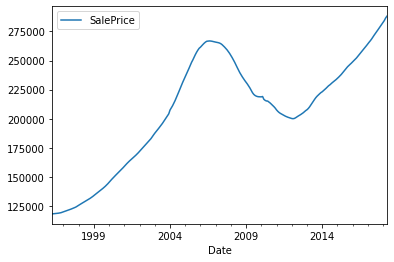

In [209]:
brooklyn.plot()

In [13]:
dc = df_sal[df_sal['State']== 'DC']

In [14]:
dc.head()

RegionID  RegionName        City State       Metro            CountyName  \
29      66126       20002  Washington    DC  Washington  District of Columbia   
33      66133       20009  Washington    DC  Washington  District of Columbia   
181     66135       20011  Washington    DC  Washington  District of Columbia   
246     66142       20019  Washington    DC  Washington  District of Columbia   
258     66125       20001  Washington    DC  Washington  District of Columbia   

     SizeRank   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
29         30   94300.0   94000.0   93700.0   93600.0   93400.0   93400.0   
33         34  178800.0  179200.0  179600.0  180000.0  180300.0  180700.0   
181       182  118900.0  118500.0  118200.0  117800.0  117600.0  117400.0   
246       247   91300.0   91000.0   90600.0   90400.0   90100.0   89900.0   
258       259   92000.0   92600.0   93200.0   93900.0   94600.0   95400.0   

      1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04  \
29    93400.0   93600.0   94000.0   94500.0   95000.0   95500.0   95900.0   
33   181200.0  181800.0  182600.0  183700.0  184800.0  185600.0  186600.0   
181  117400.0  117500.0  117800.0  118300.0  118800.0  119300.0  119800.0   
246   89700.0   89600.0   89600.0   89500.0   89500.0   89500.0   89400.0   
258   96100.0   96800.0   97700.0   98600.0   99400.0   99800.0  100100.0   

      1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11  \
29    96300.0   96600.0   96800.0   96900.0   97000.0   97100.0   97400.0   
33   187500.0  188500.0  189400.0  190400.0  191400.0  192500.0  193700.0   
181  120300.0  120800.0  121400.0  121900.0  122400.0  122900.0  123500.0   
246   89400.0   89300.0   89300.0   89200.0   89300.0   89400.0   89700.0   
258  100200.0  100100.0  100000.0   99800.0   99600.0   99400.0   99300.0   

      1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06  \
29    97800.0   98500.0   99300.0  100200.0  101300.0  102600.0  104100.0   
33   195200.0  197000.0  198600.0  200100.0  201700.0  203300.0  205000.0   
181  124200.0  124900.0  125600.0  126100.0  126500.0  126900.0  127400.0   
246   90200.0   90700.0   91300.0   92000.0   92800.0   93500.0   94300.0   
258   99500.0  100100.0  100800.0  101500.0  102500.0  103700.0  105100.0   

      1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01  \
29   105700.0  107300.0  109000.0  110600.0  112000.0  113300.0  114500.0   
33   206700.0  208400.0  210300.0  212300.0  214500.0  217100.0  220000.0   
181  127800.0  128200.0  128600.0  129200.0  129900.0  130700.0  131600.0   
246   95100.0   95900.0   96700.0   97600.0   98500.0   99400.0  100200.0   
258  106800.0  108600.0  110600.0  112700.0  114800.0  117100.0  119500.0   

      1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08  \
29   115400.0  116100.0  116700.0  117200.0  117800.0  118300.0  118800.0   
33   222900.0  225800.0  228800.0  232000.0  235300.0  238600.0  242000.0   
181  132400.0  133300.0  134100.0  135000.0  135900.0  136700.0  137400.0   
246  100900.0  101400.0  101800.0  102000.0  102100.0  102000.0  101800.0   
258  121900.0  124000.0  126000.0  127800.0  129600.0  131300.0  132700.0   

      1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03  \
29   119500.0  120200.0  121100.0  122300.0  123700.0  125200.0  126600.0   
33   245600.0  249200.0  253100.0  257400.0  262000.0  266600.0  271100.0   
181  138100.0  138800.0  139600.0  140400.0  141300.0  142200.0  143100.0   
246  101500.0  101200.0  100800.0  100500.0  100100.0   99800.0   99500.0   
258  134100.0  135400.0  136600.0  137900.0  139300.0  140700.0  141800.0   

      2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10  \
29   128000.0  129400.0  130800.0  132000.0  133100.0  134200.0  135200.0   
33   275700.0  280400.0  285100.0  289800.0  294500.0  299200.0  304100.0   
181  144100.0  145200.0  146200.0  147200.0  1

In [15]:
dc.shape

(18, 272)

In [16]:
dc=dc.drop(["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], axis=1)

In [17]:
dc.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
dc.head()

Zipcode   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
29     20002   94300.0   94000.0   93700.0   93600.0   93400.0   93400.0   
33     20009  178800.0  179200.0  179600.0  180000.0  180300.0  180700.0   
181    20011  118900.0  118500.0  118200.0  117800.0  117600.0  117400.0   
246    20019   91300.0   91000.0   90600.0   90400.0   90100.0   89900.0   
258    20001   92000.0   92600.0   93200.0   93900.0   94600.0   95400.0   

      1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04  \
29    93400.0   93600.0   94000.0   94500.0   95000.0   95500.0   95900.0   
33   181200.0  181800.0  182600.0  183700.0  184800.0  185600.0  186600.0   
181  117400.0  117500.0  117800.0  118300.0  118800.0  119300.0  119800.0   
246   89700.0   89600.0   89600.0   89500.0   89500.0   89500.0   89400.0   
258   96100.0   96800.0   97700.0   98600.0   99400.0   99800.0  100100.0   

      1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11  \
29    96300.0   96600.0   96800.0   96900.0   97000.0   97100.0   97400.0   
33   187500.0  188500.0  189400.0  190400.0  191400.0  192500.0  193700.0   
181  120300.0  120800.0  121400.0  121900.0  122400.0  122900.0  123500.0   
246   89400.0   89300.0   89300.0   89200.0   89300.0   89400.0   89700.0   
258  100200.0  100100.0  100000.0   99800.0   99600.0   99400.0   99300.0   

      1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06  \
29    97800.0   98500.0   99300.0  100200.0  101300.0  102600.0  104100.0   
33   195200.0  197000.0  198600.0  200100.0  201700.0  203300.0  205000.0   
181  124200.0  124900.0  125600.0  126100.0  126500.0  126900.0  127400.0   
246   90200.0   90700.0   91300.0   92000.0   92800.0   93500.0   94300.0   
258   99500.0  100100.0  100800.0  101500.0  102500.0  103700.0  105100.0   

      1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01  \
29   105700.0  107300.0  109000.0  110600.0  112000.0  113300.0  114500.0   
33   206700.0  208400.0  210300.0  212300.0  214500.0  217100.0  220000.0   
181  127800.0  128200.0  128600.0  129200.0  129900.0  130700.0  131600.0   
246   95100.0   95900.0   96700.0   97600.0   98500.0   99400.0  100200.0   
258  106800.0  108600.0  110600.0  112700.0  114800.0  117100.0  119500.0   

      1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08  \
29   115400.0  116100.0  116700.0  117200.0  117800.0  118300.0  118800.0   
33   222900.0  225800.0  228800.0  232000.0  235300.0  238600.0  242000.0   
181  132400.0  133300.0  134100.0  135000.0  135900.0  136700.0  137400.0   
246  100900.0  101400.0  101800.0  102000.0  102100.0  102000.0  101800.0   
258  121900.0  124000.0  126000.0  127800.0  129600.0  131300.0  132700.0   

      1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03  \
29   119500.0  120200.0  121100.0  122300.0  123700.0  125200.0  126600.0   
33   245600.0  249200.0  253100.0  257400.0  262000.0  266600.0  271100.0   
181  138100.0  138800.0  139600.0  140400.0  141300.0  142200.0  143100.0   
246  101500.0  101200.0  100800.0  100500.0  100100.0   99800.0   99500.0   
258  134100.0  135400.0  136600.0  137900.0  139300.0  140700.0  141800.0   

      2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10  \
29   128000.0  129400.0  130800.0  132000.0  133100.0  134200.0  135200.0   
33   275700.0  280400.0  285100.0  289800.0  294500.0  299200.0  304100.0   
181  144100.0  145200.0  146200.0  147200.0  148100.0  148900.0  149700.0   
246   99400.0   99400.0   99500.0   99800.0  100300.0  101000.0  101800.0   
258  142800.0  143700.0  144600.0  145600.0  146600.0  147700.0  148900.0   

      2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05  \
29   136400.0  137600.0  138900.0  140200.0  141400.0  142600.0  143700.0   
33   309100.0  314500.0  320000.0  325500.0  331100.0  336800.0  342500.0   
181  150700.0  151900.0  153300.0  154900.0  156600.0  158400.0  160400.0   

In [18]:
dc.head()

Zipcode   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
29     20002   94300.0   94000.0   93700.0   93600.0   93400.0   93400.0   
33     20009  178800.0  179200.0  179600.0  180000.0  180300.0  180700.0   
181    20011  118900.0  118500.0  118200.0  117800.0  117600.0  117400.0   
246    20019   91300.0   91000.0   90600.0   90400.0   90100.0   89900.0   
258    20001   92000.0   92600.0   93200.0   93900.0   94600.0   95400.0   

      1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04  \
29    93400.0   93600.0   94000.0   94500.0   95000.0   95500.0   95900.0   
33   181200.0  181800.0  182600.0  183700.0  184800.0  185600.0  186600.0   
181  117400.0  117500.0  117800.0  118300.0  118800.0  119300.0  119800.0   
246   89700.0   89600.0   89600.0   89500.0   89500.0   89500.0   89400.0   
258   96100.0   96800.0   97700.0   98600.0   99400.0   99800.0  100100.0   

      1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11  \
29    96300.0   96600.0   96800.0   96900.0   97000.0   97100.0   97400.0   
33   187500.0  188500.0  189400.0  190400.0  191400.0  192500.0  193700.0   
181  120300.0  120800.0  121400.0  121900.0  122400.0  122900.0  123500.0   
246   89400.0   89300.0   89300.0   89200.0   89300.0   89400.0   89700.0   
258  100200.0  100100.0  100000.0   99800.0   99600.0   99400.0   99300.0   

      1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06  \
29    97800.0   98500.0   99300.0  100200.0  101300.0  102600.0  104100.0   
33   195200.0  197000.0  198600.0  200100.0  201700.0  203300.0  205000.0   
181  124200.0  124900.0  125600.0  126100.0  126500.0  126900.0  127400.0   
246   90200.0   90700.0   91300.0   92000.0   92800.0   93500.0   94300.0   
258   99500.0  100100.0  100800.0  101500.0  102500.0  103700.0  105100.0   

      1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01  \
29   105700.0  107300.0  109000.0  110600.0  112000.0  113300.0  114500.0   
33   206700.0  208400.0  210300.0  212300.0  214500.0  217100.0  220000.0   
181  127800.0  128200.0  128600.0  129200.0  129900.0  130700.0  131600.0   
246   95100.0   95900.0   96700.0   97600.0   98500.0   99400.0  100200.0   
258  106800.0  108600.0  110600.0  112700.0  114800.0  117100.0  119500.0   

      1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08  \
29   115400.0  116100.0  116700.0  117200.0  117800.0  118300.0  118800.0   
33   222900.0  225800.0  228800.0  232000.0  235300.0  238600.0  242000.0   
181  132400.0  133300.0  134100.0  135000.0  135900.0  136700.0  137400.0   
246  100900.0  101400.0  101800.0  102000.0  102100.0  102000.0  101800.0   
258  121900.0  124000.0  126000.0  127800.0  129600.0  131300.0  132700.0   

      1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03  \
29   119500.0  120200.0  121100.0  122300.0  123700.0  125200.0  126600.0   
33   245600.0  249200.0  253100.0  257400.0  262000.0  266600.0  271100.0   
181  138100.0  138800.0  139600.0  140400.0  141300.0  142200.0  143100.0   
246  101500.0  101200.0  100800.0  100500.0  100100.0   99800.0   99500.0   
258  134100.0  135400.0  136600.0  137900.0  139300.0  140700.0  141800.0   

      2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10  \
29   128000.0  129400.0  130800.0  132000.0  133100.0  134200.0  135200.0   
33   275700.0  280400.0  285100.0  289800.0  294500.0  299200.0  304100.0   
181  144100.0  145200.0  146200.0  147200.0  148100.0  148900.0  149700.0   
246   99400.0   99400.0   99500.0   99800.0  100300.0  101000.0  101800.0   
258  142800.0  143700.0  144600.0  145600.0  146600.0  147700.0  148900.0   

      2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05  \
29   136400.0  137600.0  138900.0  140200.0  141400.0  142600.0  143700.0   
33   309100.0  314500.0  320000.0  325500.0  331100.0  336800.0  342500.0   
181  150700.0  151900.0  153300.0  154900.0  156600.0  158400.0  160400.0   

In [19]:
dc.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
dc.head()

Zipcode   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
29     20002   94300.0   94000.0   93700.0   93600.0   93400.0   93400.0   
33     20009  178800.0  179200.0  179600.0  180000.0  180300.0  180700.0   
181    20011  118900.0  118500.0  118200.0  117800.0  117600.0  117400.0   
246    20019   91300.0   91000.0   90600.0   90400.0   90100.0   89900.0   
258    20001   92000.0   92600.0   93200.0   93900.0   94600.0   95400.0   

      1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04  \
29    93400.0   93600.0   94000.0   94500.0   95000.0   95500.0   95900.0   
33   181200.0  181800.0  182600.0  183700.0  184800.0  185600.0  186600.0   
181  117400.0  117500.0  117800.0  118300.0  118800.0  119300.0  119800.0   
246   89700.0   89600.0   89600.0   89500.0   89500.0   89500.0   89400.0   
258   96100.0   96800.0   97700.0   98600.0   99400.0   99800.0  100100.0   

      1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11  \
29    96300.0   96600.0   96800.0   96900.0   97000.0   97100.0   97400.0   
33   187500.0  188500.0  189400.0  190400.0  191400.0  192500.0  193700.0   
181  120300.0  120800.0  121400.0  121900.0  122400.0  122900.0  123500.0   
246   89400.0   89300.0   89300.0   89200.0   89300.0   89400.0   89700.0   
258  100200.0  100100.0  100000.0   99800.0   99600.0   99400.0   99300.0   

      1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06  \
29    97800.0   98500.0   99300.0  100200.0  101300.0  102600.0  104100.0   
33   195200.0  197000.0  198600.0  200100.0  201700.0  203300.0  205000.0   
181  124200.0  124900.0  125600.0  126100.0  126500.0  126900.0  127400.0   
246   90200.0   90700.0   91300.0   92000.0   92800.0   93500.0   94300.0   
258   99500.0  100100.0  100800.0  101500.0  102500.0  103700.0  105100.0   

      1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01  \
29   105700.0  107300.0  109000.0  110600.0  112000.0  113300.0  114500.0   
33   206700.0  208400.0  210300.0  212300.0  214500.0  217100.0  220000.0   
181  127800.0  128200.0  128600.0  129200.0  129900.0  130700.0  131600.0   
246   95100.0   95900.0   96700.0   97600.0   98500.0   99400.0  100200.0   
258  106800.0  108600.0  110600.0  112700.0  114800.0  117100.0  119500.0   

      1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08  \
29   115400.0  116100.0  116700.0  117200.0  117800.0  118300.0  118800.0   
33   222900.0  225800.0  228800.0  232000.0  235300.0  238600.0  242000.0   
181  132400.0  133300.0  134100.0  135000.0  135900.0  136700.0  137400.0   
246  100900.0  101400.0  101800.0  102000.0  102100.0  102000.0  101800.0   
258  121900.0  124000.0  126000.0  127800.0  129600.0  131300.0  132700.0   

      1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03  \
29   119500.0  120200.0  121100.0  122300.0  123700.0  125200.0  126600.0   
33   245600.0  249200.0  253100.0  257400.0  262000.0  266600.0  271100.0   
181  138100.0  138800.0  139600.0  140400.0  141300.0  142200.0  143100.0   
246  101500.0  101200.0  100800.0  100500.0  100100.0   99800.0   99500.0   
258  134100.0  135400.0  136600.0  137900.0  139300.0  140700.0  141800.0   

      2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10  \
29   128000.0  129400.0  130800.0  132000.0  133100.0  134200.0  135200.0   
33   275700.0  280400.0  285100.0  289800.0  294500.0  299200.0  304100.0   
181  144100.0  145200.0  146200.0  147200.0  148100.0  148900.0  149700.0   
246   99400.0   99400.0   99500.0   99800.0  100300.0  101000.0  101800.0   
258  142800.0  143700.0  144600.0  145600.0  146600.0  147700.0  148900.0   

      2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05  \
29   136400.0  137600.0  138900.0  140200.0  141400.0  142600.0  143700.0   
33   309100.0  314500.0  320000.0  325500.0  331100.0  336800.0  342500.0   
181  150700.0  151900.0  153300.0  154900.0  156600.0  158400.0  160400.0   

In [20]:
## Reset dataframe index and drop old index related to original zillow dataset
dc.reset_index(drop=True)

Zipcode   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
0     20002   94300.0   94000.0   93700.0   93600.0   93400.0   93400.0   
1     20009  178800.0  179200.0  179600.0  180000.0  180300.0  180700.0   
2     20011  118900.0  118500.0  118200.0  117800.0  117600.0  117400.0   
3     20019   91300.0   91000.0   90600.0   90400.0   90100.0   89900.0   
4     20001   92000.0   92600.0   93200.0   93900.0   94600.0   95400.0   
5     20020  104500.0  103800.0  103000.0  102200.0  101400.0  100600.0   
6     20008  450100.0  448200.0  446300.0  444500.0  442900.0  441600.0   
7     20003  130000.0  130100.0  130200.0  130400.0  130600.0  130900.0   
8     20032   85700.0   85500.0   85400.0   85200.0   85000.0   84800.0   
9     20016  362000.0  361200.0  360300.0  359400.0  358500.0  357700.0   
10    20010  110500.0  111200.0  112000.0  112900.0  113800.0  114900.0   
11    20007  358100.0  356000.0  353900.0  351700.0  349600.0  347500.0   
12    20024  209800.0  208200.0  206600.0  205000.0  203300.0  201900.0   
13    20017  121700.0  121400.0  121200.0  121000.0  120900.0  120900.0   
14    20018  123000.0  122400.0  121800.0  121200.0  120700.0  120400.0   
15    20037  277800.0  275800.0  273700.0  271600.0  269500.0  267600.0   
16    20015  312400.0  311000.0  309800.0  308700.0  307900.0  307400.0   
17    20012  185000.0  184900.0  184700.0  184400.0  184100.0  183900.0   

     1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04  \
0    93400.0   93600.0   94000.0   94500.0   95000.0   95500.0   95900.0   
1   181200.0  181800.0  182600.0  183700.0  184800.0  185600.0  186600.0   
2   117400.0  117500.0  117800.0  118300.0  118800.0  119300.0  119800.0   
3    89700.0   89600.0   89600.0   89500.0   89500.0   89500.0   89400.0   
4    96100.0   96800.0   97700.0   98600.0   99400.0   99800.0  100100.0   
5   100000.0   99500.0   99200.0   99200.0   99400.0   99700.0  100200.0   
6   440700.0  440100.0  440100.0  440700.0  441600.0  442300.0  443000.0   
7   131400.0  131900.0  132700.0  133700.0  134600.0  135400.0  136200.0   
8    84600.0   84400.0   84200.0   84100.0   84000.0   83700.0   83500.0   
9   357000.0  356500.0  356400.0  356800.0  357200.0  357200.0  357100.0   
10  116100.0  117400.0  118800.0  120400.0  121800.0  123100.0  124200.0   
11  345800.0  344400.0  343600.0  343300.0  343100.0  342900.0  343000.0   
12  200500.0  199300.0  198300.0  197500.0  196800.0  196000.0  195400.0   
13  121100.0  121400.0  121900.0  122400.0  123000.0  123600.0  124200.0   
14  120200.0  120200.0  120500.0  121000.0  121600.0  122300.0  123100.0   
15  265800.0  264200.0  263100.0  262600.0  262300.0  262000.0  262000.0   
16  307300.0  307700.0  308800.0  310300.0  312300.0  314400.0  316800.0   
17  183700.0  183800.0  184200.0  184900.0  185500.0  185900.0  186100.0   

     1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11  \
0    96300.0   96600.0   96800.0   96900.0   97000.0   97100.0   97400.0   
1   187500.0  188500.0  189400.0  190400.0  191400.0  192500.0  193700.0   
2   120300.0  120800.0  121400.0  121900.0  122400.0  122900.0  123500.0   
3    89400.0   89300.0   89300.0   89200.0   89300.0   89400.0   89700.0   
4   100200.0  100100.0  100000.0   99800.0   99600.0   99400.0   99300.0   
5   100900.0  101600.0  102400.0  103200.0  103900.0  104600.0  105200.0   
6   444000.0  444900.0  445900.0  447100.0  448500.0  450200.0  452300.0   
7   137000.0  137800.0  138500.0  139200.0  139800.0  140500.0  141300.0   
8    83200.0   82900.0   82700.0   82600.0   82500.0   82500.0   82500.0   
9   357100.0  357100.0  357100.0  357200.0  357400.0  357900.0  358600.0   
10  125100.0  126000.0  126800.0  127500.0  128200.0  129000.0  129700.0   
11  343500.0  344400.0  345600.0  347100.0  348900.0  351000.0  353500.0   
12  195000.0  194800.0  194800.0  194900.0  195300.0  196000.0  197000.0   
13  124700.0  125100.0  125400.0  125600.0  125800.0  125900.0  12610

In [21]:
dc["Zipcode"]=dc["Zipcode"].astype(str)

In [22]:
## transpose dates to rows
dc=dc.transpose()
dc.head()

29      33      181    246    258     402     1263    1448   1707  \
Zipcode  20002   20009   20011  20019  20001   20020   20008   20003  20032   
1996-04  94300  178800  118900  91300  92000  104500  450100  130000  85700   
1996-05  94000  179200  118500  91000  92600  103800  448200  130100  85500   
1996-06  93700  179600  118200  90600  93200  103000  446300  130200  85400   
1996-07  93600  180000  117800  90400  93900  102200  444500  130400  85200   

           2066    2581    2653    5297    5339    5453    5805    6484  \
Zipcode   20016   20010   20007   20024   20017   20018   20037   20015   
1996-04  362000  110500  358100  209800  121700  123000  277800  312400   
1996-05  361200  111200  356000  208200  121400  122400  275800  311000   
1996-06  360300  112000  353900  206600  121200  121800  273700  309800   
1996-07  359400  112900  351700  205000  121000  121200  271600  308700   

           6887  
Zipcode   20012  
1996-04  185000  
1996-05  184900  
1996-06  184700  
1996-07  184400

In [23]:
new_header=dc.iloc[0] ##grab all first row data for the column headers
dc=dc[1:] ## take all rows after first row
dc.columns=new_header ## assign all column headers to be equal to row 0 data

In [24]:
dc.head()

Zipcode  20002   20009   20011  20019  20001   20020   20008   20003  20032  \
1996-04  94300  178800  118900  91300  92000  104500  450100  130000  85700   
1996-05  94000  179200  118500  91000  92600  103800  448200  130100  85500   
1996-06  93700  179600  118200  90600  93200  103000  446300  130200  85400   
1996-07  93600  180000  117800  90400  93900  102200  444500  130400  85200   
1996-08  93400  180300  117600  90100  94600  101400  442900  130600  85000   

Zipcode   20016   20010   20007   20024   20017   20018   20037   20015  \
1996-04  362000  110500  358100  209800  121700  123000  277800  312400   
1996-05  361200  111200  356000  208200  121400  122400  275800  311000   
1996-06  360300  112000  353900  206600  121200  121800  273700  309800   
1996-07  359400  112900  351700  205000  121000  121200  271600  308700   
1996-08  358500  113800  349600  203300  120900  120700  269500  307900   

Zipcode   20012  
1996-04  185000  
1996-05  184900  
1996-06  184700  
1996-07  184400  
1996-08  184100

In [25]:
dc.index=pd.to_datetime(dc.index)
dc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   20002   265 non-null    object
 1   20009   265 non-null    object
 2   20011   265 non-null    object
 3   20019   265 non-null    object
 4   20001   265 non-null    object
 5   20020   265 non-null    object
 6   20008   265 non-null    object
 7   20003   265 non-null    object
 8   20032   265 non-null    object
 9   20016   265 non-null    object
 10  20010   265 non-null    object
 11  20007   265 non-null    object
 12  20024   265 non-null    object
 13  20017   265 non-null    object
 14  20018   265 non-null    object
 15  20037   265 non-null    object
 16  20015   265 non-null    object
 17  20012   265 non-null    object
dtypes: object(18)
memory usage: 39.3+ KB


In [26]:
dc.reset_index()
dc.head()

Zipcode     20002   20009   20011  20019  20001   20020   20008   20003  \
1996-04-01  94300  178800  118900  91300  92000  104500  450100  130000   
1996-05-01  94000  179200  118500  91000  92600  103800  448200  130100   
1996-06-01  93700  179600  118200  90600  93200  103000  446300  130200   
1996-07-01  93600  180000  117800  90400  93900  102200  444500  130400   
1996-08-01  93400  180300  117600  90100  94600  101400  442900  130600   

Zipcode     20032   20016   20010   20007   20024   20017   20018   20037  \
1996-04-01  85700  362000  110500  358100  209800  121700  123000  277800   
1996-05-01  85500  361200  111200  356000  208200  121400  122400  275800   
1996-06-01  85400  360300  112000  353900  206600  121200  121800  273700   
1996-07-01  85200  359400  112900  351700  205000  121000  121200  271600   
1996-08-01  85000  358500  113800  349600  203300  120900  120700  269500   

Zipcode      20015   20012  
1996-04-01  312400  185000  
1996-05-01  311000  184900  
1996-06-01  309800  184700  
1996-07-01  308700  184400  
1996-08-01  307900  184100

In [27]:
dc=dc.astype(int)

In [28]:
dc.head()

Zipcode     20002   20009   20011  20019  20001   20020   20008   20003  \
1996-04-01  94300  178800  118900  91300  92000  104500  450100  130000   
1996-05-01  94000  179200  118500  91000  92600  103800  448200  130100   
1996-06-01  93700  179600  118200  90600  93200  103000  446300  130200   
1996-07-01  93600  180000  117800  90400  93900  102200  444500  130400   
1996-08-01  93400  180300  117600  90100  94600  101400  442900  130600   

Zipcode     20032   20016   20010   20007   20024   20017   20018   20037  \
1996-04-01  85700  362000  110500  358100  209800  121700  123000  277800   
1996-05-01  85500  361200  111200  356000  208200  121400  122400  275800   
1996-06-01  85400  360300  112000  353900  206600  121200  121800  273700   
1996-07-01  85200  359400  112900  351700  205000  121000  121200  271600   
1996-08-01  85000  358500  113800  349600  203300  120900  120700  269500   

Zipcode      20015   20012  
1996-04-01  312400  185000  
1996-05-01  311000  184900  
1996-06-01  309800  184700  
1996-07-01  308700  184400  
1996-08-01  307900  184100

In [29]:
dc.shape

(265, 18)

In [30]:
dc.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

Text(0, 0.5, 'Home Price $')

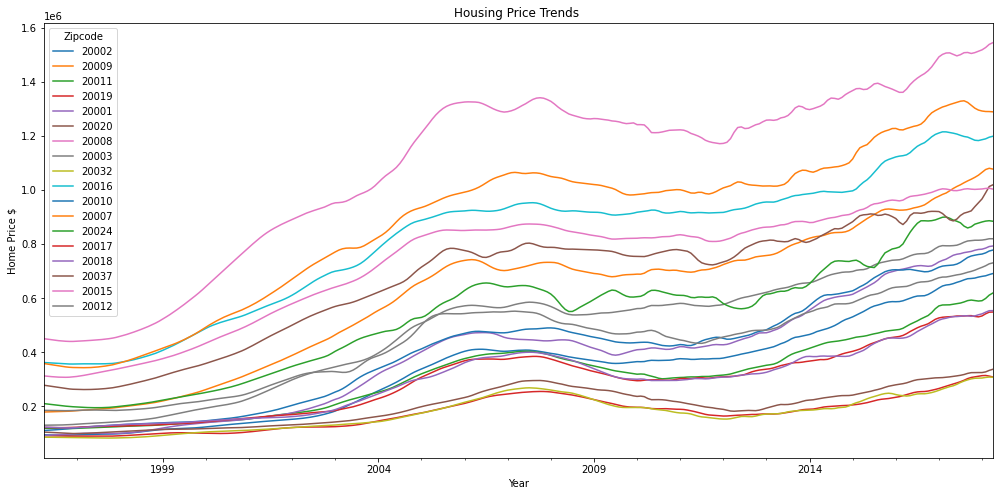

In [31]:
dc.plot(figsize=(17,8))
plt.title("Housing Price Trends ")
plt.xlabel('Year')
plt.ylabel('Home Price $')

In [32]:
# nyc = df.loc[(df['City']== 'New York') | (df['CountyName'] == 'New York')]
# nyc.head(10)
nyc = df[df['CountyName']== 'Kings']
nyc.head(10)


RegionID  RegionName      City State     Metro CountyName  SizeRank  \
10      62037       11226  New York    NY  New York      Kings        11   
13      62045       11235  New York    NY  New York      Kings        14   
47      62040       11230  New York    NY  New York      Kings        48   
49      62020       11209  New York    NY  New York      Kings        50   
53      62023       11212  New York    NY  New York      Kings        54   
58      62025       11214  New York    NY  New York      Kings        59   
70      62032       11221  New York    NY  New York      Kings        71   
72      62039       11229  New York    NY  New York      Kings        73   
95      62044       11234  New York    NY  New York      Kings        96   
106     62026       11215  New York    NY  New York      Kings       107   

      1996-04   1996-05   1996-06   1996-07   1996-08   1996-09   1996-10  \
10   162000.0  162300.0  162600.0  163000.0  163400.0  164000.0  164700.0   
13   190500.0  191000.0  191500.0  192000.0  192500.0  193000.0  193600.0   
47   230100.0  230800.0  231500.0  232100.0  232800.0  233600.0  234700.0   
49   255700.0  256600.0  257300.0  258100.0  258900.0  259800.0  260900.0   
53   125000.0  125000.0  125000.0  125000.0  125100.0  125100.0  125000.0   
58   191000.0  191200.0  191500.0  191900.0  192100.0  192400.0  192800.0   
70   133700.0  133700.0  133700.0  133700.0  133900.0  134000.0  134300.0   
72   183900.0  184200.0  184500.0  184800.0  185000.0  185100.0  185400.0   
95   172300.0  172100.0  171900.0  171600.0  171400.0  171300.0  171300.0   
106  225700.0  227500.0  229400.0  231600.0  234100.0  236900.0  239800.0   

      1996-11   1996-12   1997-01   1997-02   1997-03   1997-04   1997-05  \
10   165700.0  166800.0  167900.0  168800.0  169600.0  170400.0  171100.0   
13   194300.0  195300.0  196300.0  197200.0  197800.0  198400.0  199000.0   
47   235900.0  237500.0  239100.0  240300.0  241000.0  241400.0  241700.0   
49   262000.0  263600.0  265400.0  266900.0  268000.0  269000.0  269900.0   
53   124800.0  124600.0  124500.0  124500.0  124500.0  124500.0  124700.0   
58   193200.0  193800.0  194600.0  195100.0  195300.0  195500.0  195800.0   
70   134700.0  135300.0  136000.0  136600.0  137100.0  137500.0  138000.0   
72   185600.0  186200.0  186900.0  187300.0  187500.0  187800.0  188000.0   
95   171300.0  171500.0  171900.0  172200.0  172300.0  172300.0  172500.0   
106  242900.0  246400.0  249800.0  252200.0  253800.0  255100.0  256000.0   

      1997-06   1997-07   1997-08   1997-09   1997-10   1997-11   1997-12  \
10   171800.0  172600.0  173600.0  174700.0  176000.0  177400.0  179100.0   
13   199700.0  200400.0  201300.0  202200.0  203300.0  204500.0  206100.0   
47   241900.0  242100.0  242500.0  243200.0  244300.0  245600.0  247600.0   
49   270800.0  271600.0  272500.0  273500.0  274700.0  275900.0  277700.0   
53   125100.0  125500.0  126000.0  126400.0  126800.0  127000.0  127100.0   
58   196100.0  196500.0  196900.0  197600.0  198300.0  199300.0  200500.0   
70   138500.0  139200.0  140000.0  140900.0  141800.0  142900.0  144200.0   
72   188200.0  188600.0  189000.0  189600.0  190400.0  191300.0  192700.0   
95   172600.0  172800.0  173100.0  173500.0  174100.0  174900.0  175900.0   
106  256900.0  258200.0  260000.0  262300.0  264900.0  268000.0  271900.0   

      1998-01   1998-02   1998-03   1998-04   1998-05   1998-06   1998-07  \
10   180700.0  182000.0  183100.0  184100.0  185000.0  185900.0  186800.0   
13   208000.0  209600.0  211000.0  212500.0  214000.0  215600.0  217200.0   
47   249800.0  251600.0  253100.0  254500.0  255900.0  257300.0  258700.0   
49   279600.0  281300.0  282500.0  283500.0  284500.0  285500.0  286600.0   
53   127500.0  127900.0  128200.0  128700.0  129400.0  130100.0  131000.0   
58   202000.0  203300.0  204400.0  205600.0  206900.0  208300.0  209800.0   
70   145500.0  146600.0  147600.0  148600.0  149600.0  150600.0  151500.0   
72   194

In [33]:
nyc = nyc.drop(["RegionID", "City", "State", "Metro", "CountyName", "SizeRank"], axis=1)

In [34]:
nyc.head()

RegionName   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
10       11226  162000.0  162300.0  162600.0  163000.0  163400.0  164000.0   
13       11235  190500.0  191000.0  191500.0  192000.0  192500.0  193000.0   
47       11230  230100.0  230800.0  231500.0  232100.0  232800.0  233600.0   
49       11209  255700.0  256600.0  257300.0  258100.0  258900.0  259800.0   
53       11212  125000.0  125000.0  125000.0  125000.0  125100.0  125100.0   

     1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04  \
10  164700.0  165700.0  166800.0  167900.0  168800.0  169600.0  170400.0   
13  193600.0  194300.0  195300.0  196300.0  197200.0  197800.0  198400.0   
47  234700.0  235900.0  237500.0  239100.0  240300.0  241000.0  241400.0   
49  260900.0  262000.0  263600.0  265400.0  266900.0  268000.0  269000.0   
53  125000.0  124800.0  124600.0  124500.0  124500.0  124500.0  124500.0   

     1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11  \
10  171100.0  171800.0  172600.0  173600.0  174700.0  176000.0  177400.0   
13  199000.0  199700.0  200400.0  201300.0  202200.0  203300.0  204500.0   
47  241700.0  241900.0  242100.0  242500.0  243200.0  244300.0  245600.0   
49  269900.0  270800.0  271600.0  272500.0  273500.0  274700.0  275900.0   
53  124700.0  125100.0  125500.0  126000.0  126400.0  126800.0  127000.0   

     1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06  \
10  179100.0  180700.0  182000.0  183100.0  184100.0  185000.0  185900.0   
13  206100.0  208000.0  209600.0  211000.0  212500.0  214000.0  215600.0   
47  247600.0  249800.0  251600.0  253100.0  254500.0  255900.0  257300.0   
49  277700.0  279600.0  281300.0  282500.0  283500.0  284500.0  285500.0   
53  127100.0  127500.0  127900.0  128200.0  128700.0  129400.0  130100.0   

     1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01  \
10  186800.0  187900.0  189100.0  190400.0  192000.0  193800.0  195500.0   
13  217200.0  218900.0  220700.0  222600.0  224700.0  227200.0  229800.0   
47  258700.0  260500.0  262600.0  265000.0  268000.0  271500.0  275300.0   
49  286600.0  287700.0  289100.0  290800.0  292900.0  295600.0  298800.0   
53  131000.0  131800.0  132600.0  133300.0  133700.0  134100.0  134600.0   

     1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08  \
10  197000.0  198300.0  199500.0  200800.0  202000.0  203400.0  205100.0   
13  232200.0  234300.0  236500.0  238800.0  241000.0  243300.0  245700.0   
47  278700.0  281900.0  285200.0  288300.0  291500.0  295000.0  298900.0   
49  301800.0  304600.0  307500.0  310400.0  313400.0  316700.0  320100.0   
53  135300.0  135900.0  136700.0  137600.0  138600.0  139700.0  140900.0   

     1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03  \
10  207100.0  209300.0  211800.0  214500.0  217100.0  219500.0  221600.0   
13  248100.0  250500.0  253200.0  256200.0  259400.0  262300.0  264800.0   
47  303300.0  308200.0  313700.0  319800.0  326100.0  331700.0  336800.0   
49  323800.0  327700.0  331900.0  336800.0  341900.0  346700.0  350900.0   
53  141800.0  142700.0  143300.0  143700.0  144300.0  144900.0  145500.0   

     2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10  \
10  223500.0  225300.0  227000.0  228800.0  230700.0  233000.0  235400.0   
13  267400.0  270100.0  272800.0  275500.0  278300.0  281100.0  284200.0   
47  341700.0  346100.0  350100.0  354200.0  358400.0  363000.0  367900.0   
49  354900.0  358500.0  361800.0  365000.0  368100.0  371100.0  374300.0   
53  146100.0  146900.0  147800.0  148700.0  149600.0  150300.0  150800.0   

     2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05  \
10  238100.0  241000.0  243700.0  246100.0  248200.0  250200.0  251900.0   
13  287500.0  291300.0  295200.0  298900.0  302500.0  306100.0  309500.0   
47  373300.0  379200.0  385100.0  390300.0  395000.0  399100.0  402700.0   
49  377700.0  381500.0  385400.0

In [35]:
nyc_1 = nyc.copy()

In [36]:
nyc_1.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
nyc_1.head()

Zipcode   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
10    11226  162000.0  162300.0  162600.0  163000.0  163400.0  164000.0   
13    11235  190500.0  191000.0  191500.0  192000.0  192500.0  193000.0   
47    11230  230100.0  230800.0  231500.0  232100.0  232800.0  233600.0   
49    11209  255700.0  256600.0  257300.0  258100.0  258900.0  259800.0   
53    11212  125000.0  125000.0  125000.0  125000.0  125100.0  125100.0   

     1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04  \
10  164700.0  165700.0  166800.0  167900.0  168800.0  169600.0  170400.0   
13  193600.0  194300.0  195300.0  196300.0  197200.0  197800.0  198400.0   
47  234700.0  235900.0  237500.0  239100.0  240300.0  241000.0  241400.0   
49  260900.0  262000.0  263600.0  265400.0  266900.0  268000.0  269000.0   
53  125000.0  124800.0  124600.0  124500.0  124500.0  124500.0  124500.0   

     1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11  \
10  171100.0  171800.0  172600.0  173600.0  174700.0  176000.0  177400.0   
13  199000.0  199700.0  200400.0  201300.0  202200.0  203300.0  204500.0   
47  241700.0  241900.0  242100.0  242500.0  243200.0  244300.0  245600.0   
49  269900.0  270800.0  271600.0  272500.0  273500.0  274700.0  275900.0   
53  124700.0  125100.0  125500.0  126000.0  126400.0  126800.0  127000.0   

     1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06  \
10  179100.0  180700.0  182000.0  183100.0  184100.0  185000.0  185900.0   
13  206100.0  208000.0  209600.0  211000.0  212500.0  214000.0  215600.0   
47  247600.0  249800.0  251600.0  253100.0  254500.0  255900.0  257300.0   
49  277700.0  279600.0  281300.0  282500.0  283500.0  284500.0  285500.0   
53  127100.0  127500.0  127900.0  128200.0  128700.0  129400.0  130100.0   

     1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01  \
10  186800.0  187900.0  189100.0  190400.0  192000.0  193800.0  195500.0   
13  217200.0  218900.0  220700.0  222600.0  224700.0  227200.0  229800.0   
47  258700.0  260500.0  262600.0  265000.0  268000.0  271500.0  275300.0   
49  286600.0  287700.0  289100.0  290800.0  292900.0  295600.0  298800.0   
53  131000.0  131800.0  132600.0  133300.0  133700.0  134100.0  134600.0   

     1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08  \
10  197000.0  198300.0  199500.0  200800.0  202000.0  203400.0  205100.0   
13  232200.0  234300.0  236500.0  238800.0  241000.0  243300.0  245700.0   
47  278700.0  281900.0  285200.0  288300.0  291500.0  295000.0  298900.0   
49  301800.0  304600.0  307500.0  310400.0  313400.0  316700.0  320100.0   
53  135300.0  135900.0  136700.0  137600.0  138600.0  139700.0  140900.0   

     1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03  \
10  207100.0  209300.0  211800.0  214500.0  217100.0  219500.0  221600.0   
13  248100.0  250500.0  253200.0  256200.0  259400.0  262300.0  264800.0   
47  303300.0  308200.0  313700.0  319800.0  326100.0  331700.0  336800.0   
49  323800.0  327700.0  331900.0  336800.0  341900.0  346700.0  350900.0   
53  141800.0  142700.0  143300.0  143700.0  144300.0  144900.0  145500.0   

     2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10  \
10  223500.0  225300.0  227000.0  228800.0  230700.0  233000.0  235400.0   
13  267400.0  270100.0  272800.0  275500.0  278300.0  281100.0  284200.0   
47  341700.0  346100.0  350100.0  354200.0  358400.0  363000.0  367900.0   
49  354900.0  358500.0  361800.0  365000.0  368100.0  371100.0  374300.0   
53  146100.0  146900.0  147800.0  148700.0  149600.0  150300.0  150800.0   

     2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05  \
10  238100.0  241000.0  243700.0  246100.0  248200.0  250200.0  251900.0   
13  287500.0  291300.0  295200.0  298900.0  302500.0  306100.0  309500.0   
47  373300.0  379200.0  385100.0  390300.0  395000.0  399100.0  402700.0   
49  377700.0  381500.0  385400.0  389100.0  392300

In [37]:
nyc_1.reset_index() #drop=True

index  Zipcode   1996-04   1996-05   1996-06   1996-07   1996-08  \
0      10    11226  162000.0  162300.0  162600.0  163000.0  163400.0   
1      13    11235  190500.0  191000.0  191500.0  192000.0  192500.0   
2      47    11230  230100.0  230800.0  231500.0  232100.0  232800.0   
3      49    11209  255700.0  256600.0  257300.0  258100.0  258900.0   
4      53    11212  125000.0  125000.0  125000.0  125000.0  125100.0   
5      58    11214  191000.0  191200.0  191500.0  191900.0  192100.0   
6      70    11221  133700.0  133700.0  133700.0  133700.0  133900.0   
7      72    11229  183900.0  184200.0  184500.0  184800.0  185000.0   
8      95    11234  172300.0  172100.0  171900.0  171600.0  171400.0   
9     106    11215  225700.0  227500.0  229400.0  231600.0  234100.0   
10    117    11211  133200.0  132900.0  132500.0  132200.0  131800.0   
11    156    11238       NaN       NaN       NaN       NaN       NaN   
12    190    11233  124500.0  124500.0  124500.0  124500.0  124700.0   
13    200    11236  160900.0  161000.0  161200.0  161300.0  161500.0   
14    260    11218  177200.0  177000.0  176800.0  176700.0  176800.0   
15    265    11223  207600.0  208000.0  208400.0  208800.0  209300.0   
16    308    11208  126800.0  126700.0  126700.0  126600.0  126600.0   
17    356    11204  201100.0  201100.0  201100.0  201100.0  201100.0   
18    366    11219  213200.0  212600.0  211900.0  211300.0  210800.0   
19    372    93230   96200.0   96100.0   96000.0   96100.0   96200.0   
20    423    11203  149000.0  149200.0  149400.0  149600.0  149700.0   
21    439    11220  188500.0  188700.0  188800.0  189000.0  189400.0   
22    475    11216  146100.0  146600.0  147200.0  147700.0  148400.0   
23    700    11210  187300.0  187300.0  187200.0  187100.0  187000.0   
24    811    11224  158000.0  157300.0  156700.0  156100.0  155600.0   
25   1155    11222  149200.0  148400.0  147500.0  146600.0  146000.0   
26   1434    11205       NaN       NaN       NaN       NaN       NaN   
27   1534    11217       NaN       NaN       NaN       NaN       NaN   
28   2812    93245   93300.0   93200.0   93200.0   93200.0   93400.0   
29   3728    11228  219300.0  219600.0  219900.0  220200.0  220600.0   
30   7924    93212   72500.0   72100.0   71600.0   71200.0   70800.0   
31  12195    93202   80200.0   79800.0   79500.0   79200.0   78800.0   

     1996-09   1996-10   1996-11   1996-12   1997-01   1997-02   1997-03  \
0   164000.0  164700.0  165700.0  166800.0  167900.0  168800.0  169600.0   
1   193000.0  193600.0  194300.0  195300.0  196300.0  197200.0  197800.0   
2   233600.0  234700.0  235900.0  237500.0  239100.0  240300.0  241000.0   
3   259800.0  260900.0  262000.0  263600.0  265400.0  266900.0  268000.0   
4   125100.0  125000.0  124800.0  124600.0  124500.0  124500.0  124500.0   
5   192400.0  192800.0  193200.0  193800.0  194600.0  195100.0  195300.0   
6   134000.0  134300.0  134700.0  135300.0  136000.0  136600.0  137100.0   
7   185100.0  185400.0  185600.0  186200.0  186900.0  187300.0  187500.0   
8   171300.0  171300.0  171300.0  171500.0  171900.0  172200.0  172300.0   
9   236900.0  239800.0  242900.0  246400.0  249800.0  252200.0  253800.0   
10  131600.0  131500.0  131800.0  132400.0  133100.0  133600.0  134100.0   
11       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
12  124800.0  125200.0  125500.0  125900.0  126600.0  127400.0  128000.0   
13  161600.0  161800.0  162000.0  162300.0  162700.0  163100.0  163300.0   
14  177100.0  177600.0  178200.0  179100.0  180200.0  181000.0  181500.0   
15  209800.0  210400.0  211200.0  212400.0  213600.0  214600.0  215300.0   
16  126500.0  126400.0  126400.0  126500.0  126600.0  126800.0  126800.0   
17  201300.0  201600.0  202000.0  202700.0  203600.0  204200.0  204600.0   
18  210400.0  210200.0  210100.0  210300.0  210800.0  211200.0  211400.0   
19   96300.0   96600.0   96900.0   97200.0   97500.0   97800.0   97900.0   
20  149900.0  150100.0  150400.

In [38]:
nyc_1.shape

(32, 266)

In [39]:
#nyc_1 = nyc_1.reset_index()

In [40]:
nyc_1=nyc_1.transpose()
nyc_1.head()

10        13        47        49        53        58        70     \
Zipcode   11226.0   11235.0   11230.0   11209.0   11212.0   11214.0   11221.0   
1996-04  162000.0  190500.0  230100.0  255700.0  125000.0  191000.0  133700.0   
1996-05  162300.0  191000.0  230800.0  256600.0  125000.0  191200.0  133700.0   
1996-06  162600.0  191500.0  231500.0  257300.0  125000.0  191500.0  133700.0   
1996-07  163000.0  192000.0  232100.0  258100.0  125000.0  191900.0  133700.0   

            72        95        106       117      156       190       200    \
Zipcode   11229.0   11234.0   11215.0   11211.0  11238.0   11233.0   11236.0   
1996-04  183900.0  172300.0  225700.0  133200.0      NaN  124500.0  160900.0   
1996-05  184200.0  172100.0  227500.0  132900.0      NaN  124500.0  161000.0   
1996-06  184500.0  171900.0  229400.0  132500.0      NaN  124500.0  161200.0   
1996-07  184800.0  171600.0  231600.0  132200.0      NaN  124500.0  161300.0   

            260       265       308       356       366      372       423    \
Zipcode   11218.0   11223.0   11208.0   11204.0   11219.0  93230.0   11203.0   
1996-04  177200.0  207600.0  126800.0  201100.0  213200.0  96200.0  149000.0   
1996-05  177000.0  208000.0  126700.0  201100.0  212600.0  96100.0  149200.0   
1996-06  176800.0  208400.0  126700.0  201100.0  211900.0  96000.0  149400.0   
1996-07  176700.0  208800.0  126600.0  201100.0  211300.0  96100.0  149600.0   

            439       475       700       811       1155     1434     1534   \
Zipcode   11220.0   11216.0   11210.0   11224.0   11222.0  11205.0  11217.0   
1996-04  188500.0  146100.0  187300.0  158000.0  149200.0      NaN      NaN   
1996-05  188700.0  146600.0  187300.0  157300.0  148400.0      NaN      NaN   
1996-06  188800.0  147200.0  187200.0  156700.0  147500.0      NaN      NaN   
1996-07  189000.0  147700.0  187100.0  156100.0  146600.0      NaN      NaN   

           2812      3728     7924     12195  
Zipcode  93245.0   11228.0  93212.0  93202.0  
1996-04  93300.0  219300.0  72500.0  80200.0  
1996-05  93200.0  219600.0  72100.0  79800.0  
1996-06  93200.0  219900.0  71600.0  79500.0  
1996-07  93200.0  220200.0  71200.0  79200.0

In [41]:
new_header=nyc_1.iloc[0] ##grab all first row data for the column headers
nyc_1=nyc_1[1:] ## take all rows after first row
nyc_1.columns=new_header ## assign all column headers to be equal to row 0 data

In [42]:
nyc_1.head()

Zipcode   11226.0   11235.0   11230.0   11209.0   11212.0   11214.0   11221.0  \
1996-04  162000.0  190500.0  230100.0  255700.0  125000.0  191000.0  133700.0   
1996-05  162300.0  191000.0  230800.0  256600.0  125000.0  191200.0  133700.0   
1996-06  162600.0  191500.0  231500.0  257300.0  125000.0  191500.0  133700.0   
1996-07  163000.0  192000.0  232100.0  258100.0  125000.0  191900.0  133700.0   
1996-08  163400.0  192500.0  232800.0  258900.0  125100.0  192100.0  133900.0   

Zipcode   11229.0   11234.0   11215.0   11211.0  11238.0   11233.0   11236.0  \
1996-04  183900.0  172300.0  225700.0  133200.0      NaN  124500.0  160900.0   
1996-05  184200.0  172100.0  227500.0  132900.0      NaN  124500.0  161000.0   
1996-06  184500.0  171900.0  229400.0  132500.0      NaN  124500.0  161200.0   
1996-07  184800.0  171600.0  231600.0  132200.0      NaN  124500.0  161300.0   
1996-08  185000.0  171400.0  234100.0  131800.0      NaN  124700.0  161500.0   

Zipcode   11218.0   11223.0   11208.0   11204.0   11219.0  93230.0   11203.0  \
1996-04  177200.0  207600.0  126800.0  201100.0  213200.0  96200.0  149000.0   
1996-05  177000.0  208000.0  126700.0  201100.0  212600.0  96100.0  149200.0   
1996-06  176800.0  208400.0  126700.0  201100.0  211900.0  96000.0  149400.0   
1996-07  176700.0  208800.0  126600.0  201100.0  211300.0  96100.0  149600.0   
1996-08  176800.0  209300.0  126600.0  201100.0  210800.0  96200.0  149700.0   

Zipcode   11220.0   11216.0   11210.0   11224.0   11222.0  11205.0  11217.0  \
1996-04  188500.0  146100.0  187300.0  158000.0  149200.0      NaN      NaN   
1996-05  188700.0  146600.0  187300.0  157300.0  148400.0      NaN      NaN   
1996-06  188800.0  147200.0  187200.0  156700.0  147500.0      NaN      NaN   
1996-07  189000.0  147700.0  187100.0  156100.0  146600.0      NaN      NaN   
1996-08  189400.0  148400.0  187000.0  155600.0  146000.0      NaN      NaN   

Zipcode  93245.0   11228.0  93212.0  93202.0  
1996-04  93300.0  219300.0  72500.0  80200.0  
1996-05  93200.0  219600.0  72100.0  79800.0  
1996-06  93200.0  219900.0  71600.0  79500.0  
1996-07  93200.0  220200.0  71200.0  79200.0  
1996-08  93400.0  220600.0  70800.0  78800.0

In [43]:
#nyc_1.Zipcode
nyc_1.index=pd.to_datetime(nyc_1.index)

In [44]:
nyc_1.shape

(265, 32)

In [45]:
nyc_1.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [46]:
# nyc_1.index=pd.to_datetime(nyc_1.index)
#nyc_1.reset_index()

In [47]:
#df_wide['Date']=pd.to_datetime(df_wide['Date'])
# df_wide.set_index('Date', inplace=True)
# df_wide.head()
nyc_1.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [48]:
#nyc_1['Index']=pd.to_datetime(nyc_1['Index'])

In [49]:
nyc_1.columns

Float64Index([11226.0, 11235.0, 11230.0, 11209.0, 11212.0, 11214.0, 11221.0,
              11229.0, 11234.0, 11215.0, 11211.0, 11238.0, 11233.0, 11236.0,
              11218.0, 11223.0, 11208.0, 11204.0, 11219.0, 93230.0, 11203.0,
              11220.0, 11216.0, 11210.0, 11224.0, 11222.0, 11205.0, 11217.0,
              93245.0, 11228.0, 93212.0, 93202.0],
             dtype='float64', name='Zipcode')

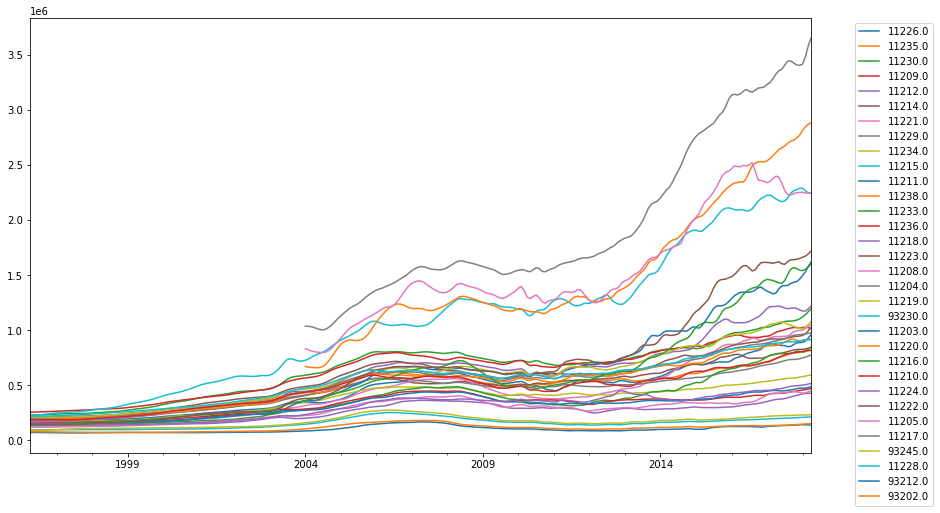

In [50]:

nyc_1.plot(figsize=(14,8));
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

In [51]:
nyc_1.head()

Zipcode      11226.0   11235.0   11230.0   11209.0   11212.0   11214.0  \
1996-04-01  162000.0  190500.0  230100.0  255700.0  125000.0  191000.0   
1996-05-01  162300.0  191000.0  230800.0  256600.0  125000.0  191200.0   
1996-06-01  162600.0  191500.0  231500.0  257300.0  125000.0  191500.0   
1996-07-01  163000.0  192000.0  232100.0  258100.0  125000.0  191900.0   
1996-08-01  163400.0  192500.0  232800.0  258900.0  125100.0  192100.0   

Zipcode      11221.0   11229.0   11234.0   11215.0   11211.0  11238.0  \
1996-04-01  133700.0  183900.0  172300.0  225700.0  133200.0      NaN   
1996-05-01  133700.0  184200.0  172100.0  227500.0  132900.0      NaN   
1996-06-01  133700.0  184500.0  171900.0  229400.0  132500.0      NaN   
1996-07-01  133700.0  184800.0  171600.0  231600.0  132200.0      NaN   
1996-08-01  133900.0  185000.0  171400.0  234100.0  131800.0      NaN   

Zipcode      11233.0   11236.0   11218.0   11223.0   11208.0   11204.0  \
1996-04-01  124500.0  160900.0  177200.0  207600.0  126800.0  201100.0   
1996-05-01  124500.0  161000.0  177000.0  208000.0  126700.0  201100.0   
1996-06-01  124500.0  161200.0  176800.0  208400.0  126700.0  201100.0   
1996-07-01  124500.0  161300.0  176700.0  208800.0  126600.0  201100.0   
1996-08-01  124700.0  161500.0  176800.0  209300.0  126600.0  201100.0   

Zipcode      11219.0  93230.0   11203.0   11220.0   11216.0   11210.0  \
1996-04-01  213200.0  96200.0  149000.0  188500.0  146100.0  187300.0   
1996-05-01  212600.0  96100.0  149200.0  188700.0  146600.0  187300.0   
1996-06-01  211900.0  96000.0  149400.0  188800.0  147200.0  187200.0   
1996-07-01  211300.0  96100.0  149600.0  189000.0  147700.0  187100.0   
1996-08-01  210800.0  96200.0  149700.0  189400.0  148400.0  187000.0   

Zipcode      11224.0   11222.0  11205.0  11217.0  93245.0   11228.0  93212.0  \
1996-04-01  158000.0  149200.0      NaN      NaN  93300.0  219300.0  72500.0   
1996-05-01  157300.0  148400.0      NaN      NaN  93200.0  219600.0  72100.0   
1996-06-01  156700.0  147500.0      NaN      NaN  93200.0  219900.0  71600.0   
1996-07-01  156100.0  146600.0      NaN      NaN  93200.0  220200.0  71200.0   
1996-08-01  155600.0  146000.0      NaN      NaN  93400.0  220600.0  70800.0   

Zipcode     93202.0  
1996-04-01  80200.0  
1996-05-01  79800.0  
1996-06-01  79500.0  
1996-07-01  79200.0  
1996-08-01  78800.0

In [52]:
nyc_1.columns

Float64Index([11226.0, 11235.0, 11230.0, 11209.0, 11212.0, 11214.0, 11221.0,
              11229.0, 11234.0, 11215.0, 11211.0, 11238.0, 11233.0, 11236.0,
              11218.0, 11223.0, 11208.0, 11204.0, 11219.0, 93230.0, 11203.0,
              11220.0, 11216.0, 11210.0, 11224.0, 11222.0, 11205.0, 11217.0,
              93245.0, 11228.0, 93212.0, 93202.0],
             dtype='float64', name='Zipcode')

In [53]:
#nyc_1[11235.0]

In [54]:
nyc_1.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [55]:
# nyc_1=nyc_1.transpose()
# nyc_1.head()
nyc_1.shape

(265, 32)

In [56]:
#nyc_1.info()

In [57]:
nyc_3 = nyc[['RegionName','1996-04','1996-05','1996-06','1996-07','1996-08']]
nyc_3.head()

RegionName   1996-04   1996-05   1996-06   1996-07   1996-08
10       11226  162000.0  162300.0  162600.0  163000.0  163400.0
13       11235  190500.0  191000.0  191500.0  192000.0  192500.0
47       11230  230100.0  230800.0  231500.0  232100.0  232800.0
49       11209  255700.0  256600.0  257300.0  258100.0  258900.0
53       11212  125000.0  125000.0  125000.0  125000.0  125100.0

In [58]:
nyc_1.describe()

Zipcode        11226.0        11235.0       11230.0       11209.0  \
count       265.000000     265.000000  2.650000e+02  2.650000e+02   
mean     461424.150943  477193.207547  6.449887e+05  6.326996e+05   
std      208018.723893  166512.159532  2.478790e+05  2.255448e+05   
min      162000.000000  190500.000000  2.301000e+05  2.557000e+05   
25%      262400.000000  326800.000000  4.211000e+05  4.110000e+05   
50%      509900.000000  528200.000000  7.100000e+05  6.960000e+05   
75%      586400.000000  591000.000000  8.020000e+05  7.828000e+05   
max      963200.000000  816200.000000  1.195400e+06  1.029200e+06   

Zipcode        11212.0        11214.0       11221.0        11229.0  \
count       265.000000     265.000000  2.650000e+02     265.000000   
mean     254192.075472  475832.452830  4.354306e+05  444412.452830   
std       85255.486213  184170.459178  2.467241e+05  156639.436249   
min      124500.000000  191000.000000  1.337000e+05  183900.000000   
25%      161800.000000  295800.000000  2.116000e+05  299700.000000   
50%      284600.000000  515600.000000  4.055000e+05  490400.000000   
75%      310900.000000  569500.000000  5.520000e+05  545000.000000   
max      428400.000000  844100.000000  1.048700e+06  775500.000000   

Zipcode       11234.0       11215.0       11211.0       11238.0  \
count       265.00000  2.650000e+02  2.650000e+02  1.720000e+02   
mean     374560.00000  1.074962e+06  5.951672e+05  1.520451e+06   
std      123160.30383  6.027273e+05  3.950731e+05  5.850422e+05   
min      171300.00000  2.257000e+05  1.315000e+05  6.592000e+05   
25%      245700.00000  5.543000e+05  2.235000e+05  1.183525e+06   
50%      415700.00000  1.069900e+06  6.090000e+05  1.270100e+06   
75%      472800.00000  1.287900e+06  7.126000e+05  1.904500e+06   
max      593300.00000  2.288900e+06  1.623700e+06  2.885300e+06   

Zipcode        11233.0        11236.0       11218.0       11223.0  \
count       265.000000     265.000000  2.650000e+02  2.650000e+02   
mean     363811.320755  322453.584906  5.903615e+05  5.538540e+05   
std      185546.903182   95059.314400  2.959864e+05  2.154546e+05   
min      124500.000000  160900.000000  1.767000e+05  2.076000e+05   
25%      187000.000000  232900.000000  3.170000e+05  3.604000e+05   
50%      348100.000000  362100.000000  6.422000e+05  5.979000e+05   
75%      463700.000000  391300.000000  7.034000e+05  6.966000e+05   
max      852300.000000  472000.000000  1.220900e+06  1.026600e+06   

Zipcode        11208.0        11204.0       11219.0        93230.0  \
count       265.000000     265.000000  2.650000e+02     265.000000   
mean     275255.849057  522227.169811  5.715155e+05  157409.811321   
std       95754.431685  213095.617893  2.478582e+05   45941.662386   
min      126400.000000  201100.000000  2.101000e+05   96000.000000   
25%      176200.000000  316000.000000  3.292000e+05  110300.000000   
50%      299300.000000  571500.000000  6.173000e+05  155600.000000   
75%      342500.000000  620500.000000  6.713000e+05  189300.000000   
max      450600.000000  976400.000000  1.079600e+06  253000.000000   

Zipcode        11203.0        11220.0       11216.0        11210.0  \
count       265.000000     265.000000  2.650000e+02     265.000000   
mean     313555.471698  504757.358491  5.721717e+05  464424.905660   
std      100242.681562  206279.328017  3.848634e+05  166975.872822   
min      149000.000000  188500.000000  1.461000e+05  186800.000000   
25%      214700.000000  304300.000000  2.464000e+05  320100.000000   
50%      336700.000000  554800.000000  5.072000e+05  493600.000000   
75%      390400.000000  603000.000000  6.816000e+05  574800.000000   
max      489900.000000  918500.000000  1.598700e+06  819600.000000   

Zipcode        11224.0       11222.0       11205.0       11217.0  \
count       265.000000  2.650000e+02  1.720000e+02  1.720000e+02   
mean     305133.962264  6.400475e+05  1.557881e+06  1.977407e+06   
std      112270.644223  4.464593e+05  4.798932e+05  7.4

In [59]:
#nyc_1.info()

In [60]:
# nyc_1 = nyc_1.set_index('RegionName').T
# nyc_1.head()

In [61]:
"""
df=   a b ent
    0  1 3  A
    1  2 4  B

is

    ent A  B
     a  1   2
     b  3   4


"""

# test = pd.pivot_table(nyc_3, values=['RegionName'], columns=['1996-04','1996-05','1996-06','1996-07','1996-08'])
# test.head()
new_header=nyc_3.iloc[0] ##grab all first row data for the column headers
nyc_3=nyc_3[1:] ## take all rows after first row
nyc_3.columns=new_header ## assign all column headers to be equal to row 0 data
# nyc_3 = nyc_3.transpose()
# header=nyc_3[1:] ## take all rows after first row
# nyc_3.columns=new_header ## assign all column headers to be equal to row 0 data
# nyc_3.head()

In [62]:
nyc_3.isna().sum()

10
11226.0     0
162000.0    3
162300.0    3
162600.0    3
163000.0    3
163400.0    3
dtype: int64

In [63]:
#nyc_3.plot()

In [64]:
nyc.isna()

RegionName  1996-04  1996-05  1996-06  1996-07  1996-08  1996-09  \
10          False    False    False    False    False    False    False   
13          False    False    False    False    False    False    False   
47          False    False    False    False    False    False    False   
49          False    False    False    False    False    False    False   
53          False    False    False    False    False    False    False   
58          False    False    False    False    False    False    False   
70          False    False    False    False    False    False    False   
72          False    False    False    False    False    False    False   
95          False    False    False    False    False    False    False   
106         False    False    False    False    False    False    False   
117         False    False    False    False    False    False    False   
156         False     True     True     True     True     True     True   
190         False    False    False    False    False    False    False   
200         False    False    False    False    False    False    False   
260         False    False    False    False    False    False    False   
265         False    False    False    False    False    False    False   
308         False    False    False    False    False    False    False   
356         False    False    False    False    False    False    False   
366         False    False    False    False    False    False    False   
372         False    False    False    False    False    False    False   
423         False    False    False    False    False    False    False   
439         False    False    False    False    False    False    False   
475         False    False    False    False    False    False    False   
700         False    False    False    False    False    False    False   
811         False    False    False    False    False    False    False   
1155        False    False    False    False    False    False    False   
1434        False     True     True     True     True     True     True   
1534        False     True     True     True     True     True     True   
2812        False    False    False    False    False    False    False   
3728        False    False    False    False    False    False    False   
7924        False    False    False    False    False    False    False   
12195       False    False    False    False    False    False    False   

       1996-10  1996-11  1996-12  1997-01  1997-02  1997-03  1997-04  1997-05  \
10       False    False    False    False    False    False    False    False   
13       False    False    False    False    False    False    False    False   
47       False    False    False    False    False    False    False    False   
49       False    False    False    False    False    False    False    False   
53       False    False    False    False    False    False    False    False   
58       False    False    False    False    False    False    False    False   
70       False    False    False    False    False    False    False    False   
72       False    False    False    False    False    False    False    False   
95       False    False    False    False    False    False    False    False   
106      False    False    False    False    False    False    False    False   
117      False    False    False    False    False    False    False    False   
156       True     True     True     True     True     True     True     True   
190      False    False    False    False    False    False    False    False   
200      False    False    False    False    False    False    False    False   
260      False    False    False    False    False    False    False    False   
265      False    False    False    False    False    False    False    False   
308      False    False    False    False    False    False    False    False   
356      False    False    False    False    False    False    False    F

In [65]:
nyc_2 = nyc.melt(id_vars=['RegionName'], 
             value_vars=['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',
       '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09',
       '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03',
       '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09',
       '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03',
       '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09',
       '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03',
       '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09',
       '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03',
       '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09',
       '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03',
       '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
       '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03',
       '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09',
       '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03',
       '2004-04', '2004-05', '2004-06', '2004-07',
                         
        '2004-08', '2004-09', '2004-10', '2004-11', '2004-12',
       '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
       '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
       '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12',
       '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12',
       '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', 
                         
         '2008-10', '2008-11', '2008-12', '2009-01', '2009-02',
       '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08',
       '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02',
       '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08',
       '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02',
       '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08',
       '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02',
       '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08',
       '2012-09', '2012-10', '2012-11',
                         
         '2012-12', '2013-01', '2013-02', '2013-03', '2013-04',
       '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10',
       '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04',
       '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
       '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
       '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
       '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
       '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
       '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
       '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04'], 
             
             var_name="Date",  # rename
             value_name="Sales")  # rename


In [66]:
nyc_2.head()

RegionName     Date     Sales
0       11226  1996-04  162000.0
1       11235  1996-04  190500.0
2       11230  1996-04  230100.0
3       11209  1996-04  255700.0
4       11212  1996-04  125000.0

In [67]:
nyc_2 = nyc_2.set_index('Date').T
nyc_2.head()

Date         1996-04   1996-04   1996-04   1996-04   1996-04   1996-04  \
RegionName   11226.0   11235.0   11230.0   11209.0   11212.0   11214.0   
Sales       162000.0  190500.0  230100.0  255700.0  125000.0  191000.0   

Date         1996-04   1996-04   1996-04   1996-04   1996-04  1996-04  \
RegionName   11221.0   11229.0   11234.0   11215.0   11211.0  11238.0   
Sales       133700.0  183900.0  172300.0  225700.0  133200.0      NaN   

Date         1996-04   1996-04   1996-04   1996-04   1996-04   1996-04  \
RegionName   11233.0   11236.0   11218.0   11223.0   11208.0   11204.0   
Sales       124500.0  160900.0  177200.0  207600.0  126800.0  201100.0   

Date         1996-04  1996-04   1996-04   1996-04   1996-04   1996-04  \
RegionName   11219.0  93230.0   11203.0   11220.0   11216.0   11210.0   
Sales       213200.0  96200.0  149000.0  188500.0  146100.0  187300.0   

Date         1996-04   1996-04  1996-04  1996-04  1996-04   1996-04  1996-04  \
RegionName   11224.0   11222.0  11205.0  11217.0  93245.0   11228.0  93212.0   
Sales       158000.0  149200.0      NaN      NaN  93300.0  219300.0  72500.0   

Date        1996-04   1996-05   1996-05   1996-05   1996-05   1996-05  \
RegionName  93202.0   11226.0   11235.0   11230.0   11209.0   11212.0   
Sales       80200.0  162300.0  191000.0  230800.0  256600.0  125000.0   

Date         1996-05   1996-05   1996-05   1996-05   1996-05   1996-05  \
RegionName   11214.0   11221.0   11229.0   11234.0   11215.0   11211.0   
Sales       191200.0  133700.0  184200.0  172100.0  227500.0  132900.0   

Date        1996-05   1996-05   1996-05   1996-05   1996-05   1996-05  \
RegionName  11238.0   11233.0   11236.0   11218.0   11223.0   11208.0   
Sales           NaN  124500.0  161000.0  177000.0  208000.0  126700.0   

Date         1996-05   1996-05  1996-05   1996-05   1996-05   1996-05  \
RegionName   11204.0   11219.0  93230.0   11203.0   11220.0   11216.0   
Sales       201100.0  212600.0  96100.0  149200.0  188700.0  146600.0   

Date         1996-05   1996-05   1996-05  1996-05  1996-05  1996-05   1996-05  \
RegionName   11210.0   11224.0   11222.0  11205.0  11217.0  93245.0   11228.0   
Sales       187300.0  157300.0  148400.0      NaN      NaN  93200.0  219600.0   

Date        1996-05  1996-05   1996-06   1996-06   1996-06   1996-06  \
RegionName  93212.0  93202.0   11226.0   11235.0   11230.0   11209.0   
Sales       72100.0  79800.0  162600.0  191500.0  231500.0  257300.0   

Date         1996-06   1996-06   1996-06   1996-06   1996-06   1996-06  \
RegionName   11212.0   11214.0   11221.0   11229.0   11234.0   11215.0   
Sales       125000.0  191500.0  133700.0  184500.0  171900.0  229400.0   

Date         1996-06  1996-06   1996-06   1996-06   1996-06   1996-06  \
RegionName   11211.0  11238.0   11233.0   11236.0   11218.0   11223.0   
Sales       132500.0      NaN  124500.0  161200.0  176800.0  208400.0   

Date         1996-06   1996-06   1996-06  1996-06   1996-06   1996-06  \
RegionName   11208.0   11204.0   11219.0  93230.0   11203.0   11220.0   
Sales       126700.0  201100.0  211900.0  96000.0  149400.0  188800.0   

Date         1996-06   1996-06   1996-06   1996-06  1996-06  1996-06  1996-06  \
RegionName   11216.0   11210.0   11224.0   11222.0  11205.0  11217.0  93245.0   
Sales       147200.0  187200.0  156700.0  147500.0      NaN      NaN  93200.0   

Date         1996-06  1996-06  1996-06   1996-07   1996-07   1996-07  \
RegionName   11228.0  93212.0  93202.0   11226.0   11235.0   11230.0   
Sales       219900.0  71600.0  79500.0  163000.0  192000.0  232100.0   

Date         1996-07   1996-07   1996-07   1996-07   1996-07   1996-07  \
RegionName   11209.0   11212.0   11214.0   11221.0   11229.0   11234.0   
Sales       258100.0  125000.0  191900.0  133700.0  184800.0  171600.0   

Date         1996-07   1996-07  1996-07   1996-07   1996-07   1996-07  \
RegionName   11215.0   11211.0  11238.0   11233.0   11236.0   11218.0   
Sales       231600.0  132200.0      

In [68]:
# from datetime import datetime
# #con=data['Month']
# nyc_2['Date']=pd.to_datetime(nyc_2['Date'])
# nyc_2.set_index('Date', inplace=True)
# nyc_2.head()

In [69]:
# nyc_2 = nyc_2.set_index('RegionName').T
# nyc_2.head()

In [70]:
# df=df.T.reset_index()
# print(df)

In [71]:
nyc_2.index

Index(['RegionName', 'Sales'], dtype='object')

In [72]:
ny_county = df.loc[(df['City']== 'New York') & (df['CountyName'] == 'New York')]
ny_county.head()

RegionID  RegionName      City State     Metro CountyName  SizeRank  \
20       61625       10011  New York    NY  New York   New York        21   
21       61703       10128  New York    NY  New York   New York        22   
272      61635       10021  New York    NY  New York   New York       273   
508      61628       10014  New York    NY  New York   New York       509   
1065     62009       11106  New York    NY  New York   New York      1066   

        1996-04    1996-05    1996-06    1996-07    1996-08    1996-09  \
20          NaN        NaN        NaN        NaN        NaN        NaN   
21    3676700.0  3704200.0  3729600.0  3754600.0  3781800.0  3813500.0   
272         NaN        NaN        NaN        NaN        NaN        NaN   
508         NaN        NaN        NaN        NaN        NaN        NaN   
1065   164600.0   165300.0   165900.0   166700.0   167400.0   168300.0   

        1996-10    1996-11    1996-12    1997-01    1997-02    1997-03  \
20          NaN        NaN        NaN        NaN        NaN        NaN   
21    3849600.0  3888900.0  3928800.0  3964600.0  3995600.0  4023800.0   
272         NaN        NaN        NaN        NaN        NaN        NaN   
508         NaN        NaN        NaN        NaN        NaN        NaN   
1065   169200.0   170300.0   171700.0   173000.0   173800.0   174400.0   

        1997-04    1997-05    1997-06    1997-07    1997-08    1997-09  \
20          NaN        NaN        NaN        NaN        NaN        NaN   
21    4048300.0  4066900.0  4080400.0  4090800.0  4101500.0  4115200.0   
272         NaN        NaN        NaN        NaN        NaN        NaN   
508         NaN        NaN        NaN        NaN        NaN        NaN   
1065   175100.0   176000.0   177100.0   178100.0   179300.0   180500.0   

        1997-10    1997-11    1997-12    1998-01    1998-02    1998-03  \
20          NaN        NaN        NaN        NaN        NaN        NaN   
21    4131900.0  4150200.0  4165900.0  4175400.0  4177500.0  4173400.0   
272         NaN        NaN        NaN        NaN        NaN        NaN   
508         NaN        NaN        NaN        NaN        NaN        NaN   
1065   181800.0   183500.0   185300.0   186800.0   187900.0   188600.0   

        1998-04    1998-05    1998-06    1998-07    1998-08    1998-09  \
20          NaN        NaN        NaN        NaN        NaN        NaN   
21    4161200.0  4140100.0  4110200.0  4073600.0  4034600.0  3996400.0   
272         NaN        NaN        NaN        NaN        NaN        NaN   
508         NaN        NaN        NaN        NaN        NaN        NaN   
1065   189500.0   190600.0   191600.0   192700.0   193900.0   195100.0   

        1998-10    1998-11    1998-12    1999-01    1999-02    1999-03  \
20          NaN        NaN        NaN        NaN        NaN        NaN   
21    3959100.0  3920900.0  3877800.0  3829500.0  3775800.0  3716400.0   
272         NaN        NaN        NaN        NaN        NaN        NaN   
508         NaN        NaN        NaN        NaN        NaN        NaN   
1065   196400.0   198100.0   200100.0   201700.0   202900.0   203800.0   

        1999-04    1999-05    1999-06    1999-07    1999-08    1999-09  \
20          NaN        NaN        NaN        NaN        NaN        NaN   
21    3649600.0  3578000.0  3502200.0  3425400.0  3352700.0  3288700.0   
272         NaN        NaN        NaN        NaN        NaN        NaN   
508         NaN        NaN        NaN        NaN        NaN        NaN   
1065   205000.0   206400.0   208100.0   210000.0   211900.0   214200.0   

        1999-10    1999-11    1999-12    2000-01    2000-02    2000-03  \
20          NaN        NaN        NaN        NaN        NaN        NaN   
21    3233300.0  3185300.0  3141500.0  3100500.0  3062900.0  3028800.0   
272         NaN        NaN        NaN        NaN        NaN        NaN   
508         NaN        NaN        NaN        NaN        NaN        NaN   
1065   216700.0   219700.0   223000.0   226100.0   228600.

In [73]:
pd.set_option('display.max_rows', None)  
ny_county.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [74]:
ny_county.shape

(6, 272)

In [75]:
ny_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 20 to 1995
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 12.8+ KB


In [76]:
"""
['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',
       '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09',
       '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03',
       '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09',
       '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03',
       '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09',
       '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03',
       '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09',
       '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03',
       '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09',
       '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03',
       '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
       '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03',
       '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09',
       '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03',
       '2004-04', '2004-05', '2004-06', '2004-07'],


"""
# cols_date = cols.columns
# cols_date[199:]

"\n['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',\n       '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',\n       '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09',\n       '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03',\n       '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09',\n       '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03',\n       '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09',\n       '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03',\n       '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09',\n       '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03',\n       '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09',\n       '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03',\n       '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',\n       '2002-10', '2002-11', '2002-12', '

In [77]:
#pd.melt(df, id_vars =['RegionId'], var_name =[cols_date])
#pd.melt(df, id_vars=[['RegionID','RegionName','City','State','Metro','CountyName','SizeRank']], value_vars=cols.columns)

df_ny = ny_county.melt(id_vars=['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'], 
             value_vars=['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',
       '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09',
       '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03',
       '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09',
       '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03',
       '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09',
       '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03',
       '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09',
       '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03',
       '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09',
       '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03',
       '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
       '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03',
       '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09',
       '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03',
       '2004-04', '2004-05', '2004-06', '2004-07',
                         
        '2004-08', '2004-09', '2004-10', '2004-11', '2004-12',
       '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
       '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
       '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12',
       '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12',
       '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', 
                         
         '2008-10', '2008-11', '2008-12', '2009-01', '2009-02',
       '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08',
       '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02',
       '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08',
       '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02',
       '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08',
       '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02',
       '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08',
       '2012-09', '2012-10', '2012-11',
                         
         '2012-12', '2013-01', '2013-02', '2013-03', '2013-04',
       '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10',
       '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04',
       '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
       '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
       '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
       '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
       '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
       '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
       '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04'], 
             
             var_name="Date",  # rename
             value_name="Sales")  # rename


In [78]:
df_ny.head(10)

RegionID  RegionName      City State     Metro CountyName  SizeRank  \
0     61625       10011  New York    NY  New York   New York        21   
1     61703       10128  New York    NY  New York   New York        22   
2     61635       10021  New York    NY  New York   New York       273   
3     61628       10014  New York    NY  New York   New York       509   
4     62009       11106  New York    NY  New York   New York      1066   
5     62041       11231  New York    NY  New York   New York      1996   
6     61625       10011  New York    NY  New York   New York        21   
7     61703       10128  New York    NY  New York   New York        22   
8     61635       10021  New York    NY  New York   New York       273   
9     61628       10014  New York    NY  New York   New York       509   

      Date      Sales  
0  1996-04        NaN  
1  1996-04  3676700.0  
2  1996-04        NaN  
3  1996-04        NaN  
4  1996-04   164600.0  
5  1996-04        NaN  
6  1996-05        NaN  
7  1996-05  3704200.0  
8  1996-05        NaN  
9  1996-05        NaN

In [79]:
print(df_ny['Date'].min())
print(df_ny['Date'].max())

1996-04
2018-04


In [80]:
df_ny.shape

(1590, 9)

In [81]:
df_ny.isna().sum()

RegionID        0
RegionName      0
City            0
State           0
Metro           0
CountyName      0
SizeRank        0
Date            0
Sales         384
dtype: int64

In [82]:
nan_vals = df_ny.isna().sum()
round(nan_vals / len(df_ny),4)

RegionID      0.0000
RegionName    0.0000
City          0.0000
State         0.0000
Metro         0.0000
CountyName    0.0000
SizeRank      0.0000
Date          0.0000
Sales         0.2415
dtype: float64

In [83]:
df_ny.bfill(inplace=True)

In [84]:
df_ny.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
Date          0
Sales         0
dtype: int64

In [85]:
df_ny.head()

RegionID  RegionName      City State     Metro CountyName  SizeRank  \
0     61625       10011  New York    NY  New York   New York        21   
1     61703       10128  New York    NY  New York   New York        22   
2     61635       10021  New York    NY  New York   New York       273   
3     61628       10014  New York    NY  New York   New York       509   
4     62009       11106  New York    NY  New York   New York      1066   

      Date      Sales  
0  1996-04  3676700.0  
1  1996-04  3676700.0  
2  1996-04   164600.0  
3  1996-04   164600.0  
4  1996-04   164600.0

In [86]:
from datetime import datetime
#con=data['Month']
df_ny['Date']=pd.to_datetime(df_ny['Date'])
df_ny.set_index('Date', inplace=True)
df_ny.head()

RegionID  RegionName      City State     Metro CountyName  \
Date                                                                    
1996-04-01     61625       10011  New York    NY  New York   New York   
1996-04-01     61703       10128  New York    NY  New York   New York   
1996-04-01     61635       10021  New York    NY  New York   New York   
1996-04-01     61628       10014  New York    NY  New York   New York   
1996-04-01     62009       11106  New York    NY  New York   New York   

            SizeRank      Sales  
Date                             
1996-04-01        21  3676700.0  
1996-04-01        22  3676700.0  
1996-04-01       273   164600.0  
1996-04-01       509   164600.0  
1996-04-01      1066   164600.0

In [87]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1590 entries, 1996-04-01 to 2018-04-01
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1590 non-null   int64  
 1   RegionName  1590 non-null   int64  
 2   City        1590 non-null   object 
 3   State       1590 non-null   object 
 4   Metro       1590 non-null   object 
 5   CountyName  1590 non-null   object 
 6   SizeRank    1590 non-null   int64  
 7   Sales       1590 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 111.8+ KB


In [88]:
df_ny.head(30)

RegionID  RegionName      City State     Metro CountyName  \
Date                                                                    
1996-04-01     61625       10011  New York    NY  New York   New York   
1996-04-01     61703       10128  New York    NY  New York   New York   
1996-04-01     61635       10021  New York    NY  New York   New York   
1996-04-01     61628       10014  New York    NY  New York   New York   
1996-04-01     62009       11106  New York    NY  New York   New York   
1996-04-01     62041       11231  New York    NY  New York   New York   
1996-05-01     61625       10011  New York    NY  New York   New York   
1996-05-01     61703       10128  New York    NY  New York   New York   
1996-05-01     61635       10021  New York    NY  New York   New York   
1996-05-01     61628       10014  New York    NY  New York   New York   
1996-05-01     62009       11106  New York    NY  New York   New York   
1996-05-01     62041       11231  New York    NY  New York   New York   
1996-06-01     61625       10011  New York    NY  New York   New York   
1996-06-01     61703       10128  New York    NY  New York   New York   
1996-06-01     61635       10021  New York    NY  New York   New York   
1996-06-01     61628       10014  New York    NY  New York   New York   
1996-06-01     62009       11106  New York    NY  New York   New York   
1996-06-01     62041       11231  New York    NY  New York   New York   
1996-07-01     61625       10011  New York    NY  New York   New York   
1996-07-01     61703       10128  New York    NY  New York   New York   
1996-07-01     61635       10021  New York    NY  New York   New York   
1996-07-01     61628       10014  New York    NY  New York   New York   
1996-07-01     62009       11106  New York    NY  New York   New York   
1996-07-01     62041       11231  New York    NY  New York   New York   
1996-08-01     61625       10011  New York    NY  New York   New York   
1996-08-01     61703       10128  New York    NY  New York   New York   
1996-08-01     61635       10021  New York    NY  New York   New York   
1996-08-01     61628       10014  New York    NY  New York   New York   
1996-08-01     62009       11106  New York    NY  New York   New York   
1996-08-01     62041       11231  New York    NY  New York   New York   

            SizeRank      Sales  
Date                             
1996-04-01        21  3676700.0  
1996-04-01        22  3676700.0  
1996-04-01       273   164600.0  
1996-04-01       509   164600.0  
1996-04-01      1066   164600.0  
1996-04-01      1996  3704200.0  
1996-05-01        21  3704200.0  
1996-05-01        22  3704200.0  
1996-05-01       273   165300.0  
1996-05-01       509   165300.0  
1996-05-01      1066   165300.0  
1996-05-01      1996  3729600.0  
1996-06-01        21  3729600.0  
1996-06-01        22  3729600.0  
1996-06-01       273   165900.0  
1996-06-01       509   165900.0  
1996-06-01      1066   165900.0  
1996-06-01      1996  3754600.0  
1996-07-01        21  3754600.0  
1996-07-01        22  3754600.0  
1996-07-01       273   166700.0  
1996-07-01       509   166700.0  
1996-07-01      1066   166700.0  
1996-07-01      1996  3781800.0  
1996-08-01        21  3781800.0  
1996-08-01        22  3781800.0  
1996-08-01       273   167400.0  
1996-08-01       509   167400.0  
1996-08-01      1066   167400.0  
1996-08-01      1996  3813500.0

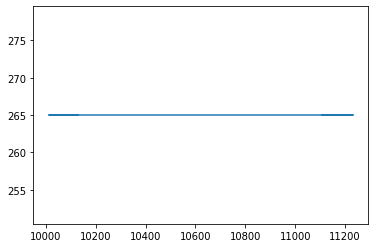

In [89]:
df_ny['RegionName'].value_counts().plot()

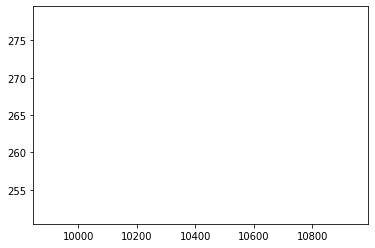

In [90]:
ts = df_ny['RegionName'].resample('MS').mean()
ts.value_counts().plot()

In [91]:
df_ny_1 = df_ny[['RegionName','Sales']]

In [92]:
df_ny_1.head()

RegionName      Sales
Date                             
1996-04-01       10011  3676700.0
1996-04-01       10128  3676700.0
1996-04-01       10021   164600.0
1996-04-01       10014   164600.0
1996-04-01       11106   164600.0

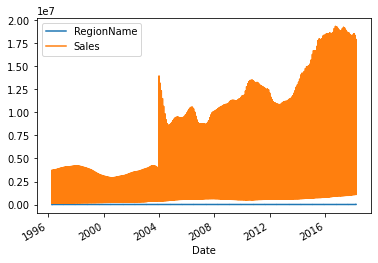

In [93]:
df_ny_1.plot()

In [94]:
#df_wide.isna().mean().round(4) * 100

# Step 2: Data Preprocessing

In [95]:
ny_county_1 = ny_county.copy()

In [96]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [97]:
#get_datetimes(ny_county_1)

In [98]:
from datetime import datetime
#con=data['Month']
# df_wide['Date']=pd.to_datetime(df_wide['Date'])
# df_wide.set_index('Date', inplace=True)
# df_wide.head()

In [99]:
#df_wide.columns

In [100]:
# region = df_wide['RegionName']
# region.head()

In [101]:
#df_wide.index

In [102]:
#'City','CountyName'


In [103]:
ny_county.index

Int64Index([20, 21, 272, 508, 1065, 1995], dtype='int64')

In [104]:
# ny_sales_daily = ny_county['Sales'].resample('D').mean()
# ny_sales_daily.index

In [105]:
#ny_sales_daily.isna().sum()

In [106]:
#ny_sales_daily = ny_sales_daily.fillna(ny_sales_daily.bfill())

In [107]:
#ny_sales_daily.isna().sum()

In [108]:
#ny_sales_daily.plot()

In [109]:
#df1 = df[['a', 'b']]
#ny_sales_daily.loc['RegionName','Sales']
#ny_sales_daily.head()

In [110]:
# sales_daily = df_wide['Sales'].resample('D').mean()
# sales_daily.index

In [111]:
#sales_daily = sales_daily.fillna(sales_daily.bfill())

In [113]:
# plt.figure(figsize=(12,5))
# sales.plot();
def ts_plot(df,title=f'Testing'):
    fig,ax = plt.subplots(figsize=(12,5));
    df.plot()
    label_font = {'weight':'bold','size':15}
#   ax.set_ylabel('Counts',fontdict=label_font)
#   ax.set_xlabel(fontdict=label_font)
#   ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
#   ax.set_xticklabels(ticklabels)
    ax.legend()
    ax.get_legend().set_bbox_to_anchor([1,1])
    ax.set(title=f'{title} by: {df.index.freq}')
    #fig = plt.figure(figsize=(12,5))
    print(df.head())
    return ax

In [114]:
#ts_plot(sales_daily, title='Daily Sales')

In [115]:
def stationary_test(df):
    rolling_mean = df.rolling(window=12).mean()
    rolling_std = df.rolling(window=12).std()

    plt.plot(df,color='blue',label='orignal')
    plt.plot(rolling_mean, color='red',label='Rolling Mean')
    plt.plot(rolling_std, color='green',label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Rolling Standard Deviation')
    #plt.show()
    result = adfuller(df)
    print('ADF statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{} : {}'.format(key,value))
        
    names = ['Test Statistic','p-value','#Lags Used','# of Observations Used']
    res  = dict(zip(names,result[:4]))
    res['Stationary Results'] = res['p-value']<.05
    
    return pd.DataFrame(res,index=['AD Fuller Results'])    

In [116]:
#stationary_test(sales_daily)

In [117]:
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    display (dfoutput.round(3))
    
    return dfoutput

In [118]:
#stationarity_check(sales_daily);

## Removing Trends

### Log-Transformation (np.log)


In [119]:
# sales_log = np.log(sales_daily)
# sales_log.plot()
# stationarity_check(sales_log)

In [120]:
def adfuller_test_df(ts):
    """Returns the AD Fuller Test Results and p-values for the null hypothesis
    that there the data is non-stationary (that there is a unit root in the data)"""
    df_res = adfuller(ts)
    names = ['Test Statistic','p-value','#Lags Used','# of Observations Used']
    res  = dict(zip(names,df_res[:4]))
    res['p<.05'] = res['p-value']<.05
    res['Stationary?'] = res['p<.05']
    
    return pd.DataFrame(res,index=['AD Fuller Results'])

In [121]:
# ts3 = np.log(sales_log)
# ts3.plot()
# adfuller_test_df(ts3)

### Differencing

In [122]:
# ts0 = sales_daily.diff().dropna()
# ts0.plot()

# adfuller_test_df(ts0)

### Subtract Rolling Mean (ts-ts.rolling().mean())

In [123]:
## Subtract Rolling mean
# ts2 = (sales_daily - sales_daily.rolling(3).mean()).dropna()
# ts2.plot()
# adfuller_test_df(ts2)

In [124]:
## Subtract Exponentially Weight Mean Rolling mean
# ts4 = (sales_daily - sales_daily.ewm(halflife=7).mean()).dropna()
# ts4.plot()
# adfuller_test_df(ts4)

# Step 3: EDA and Visualization

In [125]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [126]:
#ny_county_1.head()

# Step 4: Reshape from Wide to Long Format

In [127]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [128]:
#melt_data(ny_county_1)

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results

In [129]:
df_ny.head()

RegionID  RegionName      City State     Metro CountyName  \
Date                                                                    
1996-04-01     61625       10011  New York    NY  New York   New York   
1996-04-01     61703       10128  New York    NY  New York   New York   
1996-04-01     61635       10021  New York    NY  New York   New York   
1996-04-01     61628       10014  New York    NY  New York   New York   
1996-04-01     62009       11106  New York    NY  New York   New York   

            SizeRank      Sales  
Date                             
1996-04-01        21  3676700.0  
1996-04-01        22  3676700.0  
1996-04-01       273   164600.0  
1996-04-01       509   164600.0  
1996-04-01      1066   164600.0

In [130]:
df_ny['RegionName'].unique()

array([10011, 10128, 10021, 10014, 11106, 11231])

In [131]:
chosen_zips = [10011, 10128, 10021, 10014, 11106, 11231]
chi_dict = {}
for zipcode, data in df_ny.groupby('RegionName'):
    
    if zipcode in chosen_zips:
        data.to_csv('{}.csv'.format(zipcode), header=True,      index_label=False)
        
        chi_dict[zipcode] = pd.read_csv('{}.csv'.format(zipcode))
    else:
        continue


In [132]:
#print(chi_dict)

In [133]:
df.head(30)

RegionID  RegionName           City State                           Metro  \
0      84654       60657        Chicago    IL                         Chicago   
1      90668       75070       McKinney    TX               Dallas-Fort Worth   
2      91982       77494           Katy    TX                         Houston   
3      84616       60614        Chicago    IL                         Chicago   
4      93144       79936        El Paso    TX                         El Paso   
5      91733       77084        Houston    TX                         Houston   
6      61807       10467       New York    NY                        New York   
7      84640       60640        Chicago    IL                         Chicago   
8      91940       77449           Katy    TX                         Houston   
9      97564       94109  San Francisco    CA                   San Francisco   
10     62037       11226       New York    NY                        New York   
11     71831       32162   The Villages    FL                    The Villages   
12     62087       11375       New York    NY                        New York   
13     62045       11235       New York    NY                        New York   
14     74101       37013      Nashville    TN                       Nashville   
15     96107       90250      Hawthorne    CA  Los Angeles-Long Beach-Anaheim   
16     84646       60647        Chicago    IL                         Chicago   
17     74242       37211      Nashville    TN                       Nashville   
18     92593       78660   Pflugerville    TX                          Austin   
19     84620       60618        Chicago    IL                         Chicago   
20     61625       10011       New York    NY                        New York   
21     61703       10128       New York    NY                        New York   
22     92036       77573    League City    TX                         Houston   
23     92045       77584       Pearland    TX                         Houston   
24     69816       28269      Charlotte    NC                       Charlotte   
25     93123       79912        El Paso    TX                         El Paso   
26     92515       78572        Mission    TX                         McAllen   
27     97771       94565      Pittsburg    CA                   San Francisco   
28     71067       30349      Riverdale    GA                         Atlanta   
29     66126       20002     Washington    DC                      Washington   

              CountyName  SizeRank    1996-04    1996-05    1996-06  \
0                   Cook         1   334200.0   335400.0   336500.0   
1                 Collin         2   235700.0   236900.0   236700.0   
2                 Harris         3   210400.0   212200.0   212200.0   
3                   Cook         4   498100.0   500900.0   503100.0   
4                El Paso         5    77300.0    77300.0    77300.0   
5                 Harris         6    95000.0    95200.0    95400.0   
6                  Bronx         7   152900.0   152700.0   152600.0   
7                   Cook         8   216500.0   216700.0   216900.0   
8                 Harris         9    95400.0    95600.0    95800.0   
9          San Francisco        10   766000.0   771100.0   776500.0   
10                 Kings        11   162000.0   162300.0   162600.0   
11                Sumter        12   101000.0   100700.0   100400.0   
12                Queens        13   252400.0   251800.0   251400.0   
13                 Kings        14   190500.0   191000.0   191500.0   
14              Davidson        15   112400.0   112700.0   113000.0   
15           Los Angeles        16   152500.0   152600.0   152600.0   
16                  Cook        17   122700.0   122800.0   122800.0   
17              Davidson        18    97900.0    98000.0    98200.0   
18                Travis        19   138900.0   138600.0   138400.0   
19                  Cook        20   142600.0   143100.0   143400.0   
2

In [134]:
#df['SizeRank'].value_counts()

In [135]:
#Get zipcodes with a size rank in the top 20% (highly urbanized zipcodes).
print(df.SizeRank.describe(),'\n')
#Calculate the 20% cutoff value.
sr_20 = df.SizeRank.quantile(q=0.20)
print(f'Size Rank 20% cutoff value: {sr_20}')
#Get data frame with selected zipcodes. Keep values and zipcodes only.
zc_top20= df[df['SizeRank']<sr_20].drop(['RegionID','City',
                                                       'State','Metro','CountyName',
                                                       'SizeRank'],axis=1)
print(f'Amount of zipcodes: {len(zc_top20)}')


count    14723.000000
mean      7362.000000
std       4250.308342
min          1.000000
25%       3681.500000
50%       7362.000000
75%      11042.500000
max      14723.000000
Name: SizeRank, dtype: float64 

Size Rank 20% cutoff value: 2945.4
Amount of zipcodes: 2945


In [136]:
zc_top20.head()

RegionName   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
0       60657  334200.0  335400.0  336500.0  337600.0  338500.0  339500.0   
1       75070  235700.0  236900.0  236700.0  235400.0  233300.0  230600.0   
2       77494  210400.0  212200.0  212200.0  210700.0  208300.0  205500.0   
3       60614  498100.0  500900.0  503100.0  504600.0  505500.0  505700.0   
4       79936   77300.0   77300.0   77300.0   77300.0   77400.0   77500.0   

    1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04  \
0  340400.0  341300.0  342600.0  344400.0  345700.0  346700.0  347800.0   
1  227300.0  223400.0  219600.0  215800.0  211100.0  205700.0  200900.0   
2  202500.0  199800.0  198300.0  197300.0  195400.0  193000.0  191800.0   
3  505300.0  504200.0  503600.0  503400.0  502200.0  500000.0  497900.0   
4   77600.0   77700.0   77700.0   77800.0   77900.0   77900.0   77800.0   

    1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11  \
0  349000.0  350400.0  352000.0  353900.0  356200.0  358800.0  361800.0   
1  196800.0  193600.0  191400.0  190400.0  190800.0  192700.0  196000.0   
2  191800.0  193000.0  195200.0  198400.0  202800.0  208000.0  213800.0   
3  496300.0  495200.0  494700.0  494900.0  496200.0  498600.0  502000.0   
4   77800.0   77800.0   77800.0   77800.0   77900.0   78100.0   78200.0   

    1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06  \
0  365700.0  370200.0  374700.0  378900.0  383500.0  388300.0  393300.0   
1  201300.0  207400.0  212200.0  214600.0  215100.0  213400.0  210200.0   
2  220700.0  227500.0  231800.0  233400.0  233900.0  233500.0  233300.0   
3  507600.0  514900.0  522200.0  529500.0  537900.0  546900.0  556400.0   
4   78400.0   78600.0   78800.0   79000.0   79100.0   79200.0   79300.0   

    1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01  \
0  398500.0  403800.0  409100.0  414600.0  420100.0  426200.0  432600.0   
1  206100.0  202100.0  198800.0  196100.0  194100.0  193400.0  193400.0   
2  234300.0  237400.0  242800.0  250200.0  258600.0  268000.0  277000.0   
3  566100.0  575600.0  584800.0  593500.0  601600.0  610100.0  618600.0   
4   79300.0   79300.0   79400.0   79500.0   79500.0   79600.0   79700.0   

    1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08  \
0  438600.0  444200.0  450000.0  455900.0  462100.0  468500.0  475300.0   
1  193100.0  192700.0  193000.0  193700.0  194800.0  196100.0  197800.0   
2  283600.0  288500.0  293900.0  299200.0  304300.0  308600.0  311400.0   
3  625600.0  631100.0  636600.0  642100.0  647600.0  653300.0  659300.0   
4   79900.0   80100.0   80300.0   80600.0   80900.0   81200.0   81400.0   

    1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03  \
0  482500.0  490200.0  498200.0  507200.0  516800.0  526300.0  535300.0   
1  199700.0  201900.0  204500.0  207800.0  211500.0  214900.0  217800.0   
2  312300.0  311900.0  311100.0  311700.0  313500.0  315000.0  316700.0   
3  665800.0  672900.0  680500.0  689600.0  699700.0  709300.0  718300.0   
4   81700.0   82100.0   82400.0   82600.0   82800.0   82900.0   83000.0   

    2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10  \
0  544500.0  553500.0  562400.0  571200.0  579800.0  588100.0  596300.0   
1  221100.0  224100.0  226700.0  228200.0  228500.0  227200.0  224900.0   
2  319800.0  323700.0  327500.0  329900.0  329800.0  326400.0  320100.0   
3  727600.0  737100.0  746600.0  756200.0  765800.0  775100.0  784400.0   
4   83000.0   82900.0   82800.0   82700.0   82400.0   82100.0   81900.0   

    2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05  \
0  604200.0  612200.0  620200.0  627700.0  634500.0  641000.0  647000.0   
1  221900.0  219100.0  216900.0  215400.0  214500.0  214600.0  215600.0   
2  312200.0  304700.0  298700.0  294300.0  291400.0  290800.0  291600.0   
3  793500.0  803000.0  812500.0  821200.0  829200.0  837000.0  844400.0   
4   8160

In [137]:
zc_top20['yr_avg']=zc_top20.iloc[:,-12:].mean(skipna=True, axis=1)
#Get zipcodes with an average value 1 decile above the median and 1.5 deciles below.
print(zc_top20['yr_avg'].describe(),'\n')
#Calculate the 60% cutoff value (1 decile above).
q_60 = zc_top20['yr_avg'].quantile(q=0.60)
print(f'Average Value 60% cutoff value: {round(q_60,2)}')
#Calculate the 35% cutoff value (1.5 deciles below).
q_35 = zc_top20['yr_avg'].quantile(q=0.35)
print(f'Average Value 35% cutoff value: {round(q_35,2)}')
#Get data frame with selected zipcodes.
zc_pref= zc_top20[(zc_top20['yr_avg']<q_60) & (zc_top20['yr_avg']>q_35)]
print(f'Amount of zipcodes: {len(zc_pref)}')


count    2.945000e+03
mean     3.730666e+05
std      5.836511e+05
min      3.632500e+04
25%      1.691333e+05
50%      2.484083e+05
75%      3.978333e+05
max      1.858138e+07
Name: yr_avg, dtype: float64 

Average Value 60% cutoff value: 290211.67
Average Value 35% cutoff value: 198641.67
Amount of zipcodes: 736


In [138]:
#df.median()

In [139]:
marin_df = df[df["CountyName"] == "Marin"].median()
marin_df.head()


RegionID       97882.0
RegionName     94943.0
SizeRank        6966.0
1996-04       344050.0
1996-05       343800.0
dtype: float64

In [140]:
df_data = df.melt(id_vars=['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'], 
             value_vars=['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',
       '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09',
       '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03',
       '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09',
       '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03',
       '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09',
       '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03',
       '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09',
       '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03',
       '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09',
       '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03',
       '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
       '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03',
       '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09',
       '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03',
       '2004-04', '2004-05', '2004-06', '2004-07',
                         
        '2004-08', '2004-09', '2004-10', '2004-11', '2004-12',
       '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
       '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
       '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12',
       '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12',
       '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', 
                         
         '2008-10', '2008-11', '2008-12', '2009-01', '2009-02',
       '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08',
       '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02',
       '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08',
       '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02',
       '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08',
       '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02',
       '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08',
       '2012-09', '2012-10', '2012-11',
                         
         '2012-12', '2013-01', '2013-02', '2013-03', '2013-04',
       '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10',
       '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04',
       '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
       '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
       '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
       '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
       '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
       '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
       '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04'], 
             
             var_name="Date",  # rename
             value_name="Sales")  # rename


In [141]:
df_data.head(10)

RegionID  RegionName           City State              Metro  \
0     84654       60657        Chicago    IL            Chicago   
1     90668       75070       McKinney    TX  Dallas-Fort Worth   
2     91982       77494           Katy    TX            Houston   
3     84616       60614        Chicago    IL            Chicago   
4     93144       79936        El Paso    TX            El Paso   
5     91733       77084        Houston    TX            Houston   
6     61807       10467       New York    NY           New York   
7     84640       60640        Chicago    IL            Chicago   
8     91940       77449           Katy    TX            Houston   
9     97564       94109  San Francisco    CA      San Francisco   

      CountyName  SizeRank     Date     Sales  
0           Cook         1  1996-04  334200.0  
1         Collin         2  1996-04  235700.0  
2         Harris         3  1996-04  210400.0  
3           Cook         4  1996-04  498100.0  
4        El Paso         5  1996-04   77300.0  
5         Harris         6  1996-04   95000.0  
6          Bronx         7  1996-04  152900.0  
7           Cook         8  1996-04  216500.0  
8         Harris         9  1996-04   95400.0  
9  San Francisco        10  1996-04  766000.0

In [142]:
len(df_data[df_data['SizeRank'] == 640])

265

In [143]:
len(df_data.loc[df_data['Metro'] == 'New York'])

206435

In [144]:
# metro_sort = sorted(df_data['Sales'])
# metro_sort

In [145]:
df_sort = df_data.sort_values('Sales', ascending=False)
df_sort.head()

RegionID  RegionName      City State     Metro CountyName  SizeRank  \
3622130     61635       10021  New York    NY  New York   New York       273   
3636853     61635       10021  New York    NY  New York   New York       273   
3725191     61635       10021  New York    NY  New York   New York       273   
3739914     61635       10021  New York    NY  New York   New York       273   
3651576     61635       10021  New York    NY  New York   New York       273   

            Date       Sales  
3622130  2016-10  19314900.0  
3636853  2016-11  19282600.0  
3725191  2017-05  19215000.0  
3739914  2017-06  19128600.0  
3651576  2016-12  19103000.0

In [146]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_sort.describe()

RegionID  RegionName    SizeRank        Sales
count 3901595.000 3901595.000 3901595.000  3744704.000
mean    81075.010   48222.349    7362.000   207606.383
std     31933.038   29358.332    4250.165   240020.727
min     58196.000    1001.000       1.000    11300.000
25%     67174.000   22101.000    3681.000    97900.000
50%     78007.000   46106.000    7362.000   147600.000
75%     90921.000   75206.000   11043.000   237200.000
max    753844.000   99901.000   14723.000 19314900.000

In [147]:
region_name_sort = df_sort['RegionName'].value_counts()

In [148]:
ny_city = df_data[df_data['CountyName']== 'New York']
ny_city['RegionName'].value_counts()

10128    265
10021    265
10014    265
10011    265
11231    265
11106    265
Name: RegionName, dtype: int64

In [149]:
ny_city.shape

(1590, 9)

In [150]:
ny= df_sort[df_sort['Metro'] == 'New York']
ny.head()

RegionID  RegionName      City State     Metro CountyName  SizeRank  \
3622130     61635       10021  New York    NY  New York   New York       273   
3636853     61635       10021  New York    NY  New York   New York       273   
3725191     61635       10021  New York    NY  New York   New York       273   
3739914     61635       10021  New York    NY  New York   New York       273   
3651576     61635       10021  New York    NY  New York   New York       273   

            Date        Sales  
3622130  2016-10 19314900.000  
3636853  2016-11 19282600.000  
3725191  2017-05 19215000.000  
3739914  2017-06 19128600.000  
3651576  2016-12 19103000.000

In [151]:
len(ny)

206435

In [152]:
#ny['RegionName'].value_counts()
ny_king = ny.loc[(ny['CountyName']== 'New York') | (ny['CountyName']== 'Kings')]
ny['RegionName'].head()

3622130    10021
3636853    10021
3725191    10021
3739914    10021
3651576    10021
Name: RegionName, dtype: int64

In [153]:
kings = ny_king[ny_king['CountyName']== 'Kings']
kings['RegionName'].value_counts()

11238    265
11234    265
11209    265
11217    265
11221    265
11229    265
11233    265
11204    265
11208    265
11212    265
11216    265
11220    265
11224    265
11228    265
11236    265
11203    265
11211    265
11215    265
11219    265
11223    265
11235    265
11210    265
11214    265
11218    265
11222    265
11226    265
11230    265
11205    265
Name: RegionName, dtype: int64

In [154]:
kings.describe()

RegionID  RegionName  SizeRank       Sales
count  7420.000    7420.000  7420.000    7141.000
mean  62030.714   11220.000   482.786  582268.660
std       9.732      10.093   744.941  458218.321
min   62014.000   11203.000    11.000  124500.000
25%   62022.750   11211.750    72.500  286000.000
50%   62030.500   11219.500   231.000  475300.000
75%   62038.250   11228.250   449.000  688100.000
max   62048.000   11238.000  3729.000 3656000.000

In [155]:
kings_9 = kings[kings['Sales']> 900000.00]
kings_9['RegionName'].value_counts()

11217    172
11205    160
11215    160
11238    158
11211     56
11222     52
11216     45
11218     38
11209     33
11219     32
11230     32
11221     24
11223     18
11204     13
11220      9
11228      5
11226      3
Name: RegionName, dtype: int64

In [156]:
kings_9.shape

(1010, 9)

In [157]:
#df_data[df_data['CountyName'] == 'Los Angeles']

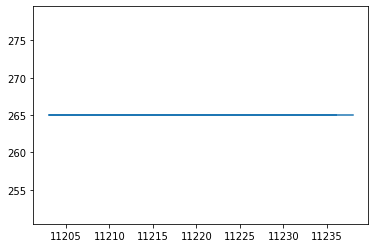

In [158]:
kings['RegionName'].value_counts().plot()